In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
master_df = pd.read_csv("Calculations.csv")
master_df["ZIP"] = master_df["ZIP"].astype(str).str.zfill(5)
master_df.set_index("ZIP", inplace=True)

In [4]:
# rural_df = pd.read_csv("Rural.csv")
# rural_df["ZIP"] = rural_df["GEOCODE"].astype(str).str.zfill(5)
# rural_df.set_index("ZIP", inplace=True)
# rural_df

In [5]:
# master_df["Rural"] = rural_df["Percent Rural"]
# master_df

In [6]:
stats_df = master_df[~master_df["Min Share"].isnull()][["Min Share",
                                                       "Min Share Excl B",
                                                       "Black Share",
                                                       "White Share",
                                                       "Asian Share",
                                                       "Hisp Share",
                                                       "Native Share",
                                                       'Rural', 
                                                       'PC Inc', 
                                                       'Gini',
                                                       'UR', 
                                                       '%BachOrMore',
                                                       "W_Avg Emp Min Share",
                                                       "W_Avg Emp Black Share",
                                                       "W_Avg Emp White Share",
                                                       "W_Avg Emp Asian Share",
                                                       "W_Avg Emp Hisp Share",
                                                       "W_Avg Emp Non-Hisp Share",
                                                       "W_Avg Emp Min Share",
                                                       "W_Avg Emp Min Share",
                                                       "Total Pop",
                                                       "Loans per Emp Bus",
                                                       "Avg Loan Amt per Emp",
                                                       "Loans per Emp Bus_1",
                                                       "Avg Loan Amt per Emp_1",
                                                       "Loans per Emp Bus_2",
                                                       "Avg Loan Amt per Emp_2",
                                                       "Loans per Emp Bus_3",
                                                       "Avg Loan Amt per Emp_3"]]

In [7]:
# excluded_prefixes = ('962',
# '963',
# '964',
# '965',
# '966',
# '090',
# '091',
# '092',
# '093',
# '094',
# '095',
# '096',
# '097',
# '098',
# '006',
# '007',
# '008',
# '009')

# stats_df = stats_df[~stats_df.index.str.startswith(excluded_prefixes)]
# stats_df

In [8]:
stats_df["Avg Loan Amt per Emp_2 Adj"] = stats_df["Avg Loan Amt per Emp_2"] * 349 / 320
stats_df["Avg Loan Amt per Emp_3 Adj"] = stats_df["Avg Loan Amt per Emp_3"] * 349 / 284.5

In [9]:
region_mappings = {
    '9': 'West',
    '8': 'West',
    '59': 'West',
    '7': 'South',
    '885': 'South',
    '3': 'South',
    '40': 'South',
    '41': 'South',
    '42': 'South',
    '2': 'South',
    '197': 'South',
    '198': 'South',
    '199': 'South',
    '569': 'South',
    '5': 'Midwest',
    '6': 'Midwest',
    '4': 'Midwest',
    '0': 'Northeast',
    '1': 'Northeast',
}

# Define a function to map ZIP code to region based on the first few digits
def map_zip_to_region(zip_code):
    for i in range(len(zip_code), 0, -1):
        prefix = zip_code[:i]
        if prefix in region_mappings:
            return region_mappings[prefix]
    return None  # Return None if no match is found

# Apply the function to each ZIP code in the DataFrame index and create a new column
stats_df['Census Region'] = stats_df.index.map(map_zip_to_region)

In [10]:
def plot_binned_means(df, x_col, y_col, weight_col):
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col, y_col, weight_col])

    # Create bins for the x column
    df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)

    # Initialize figure
    plt.figure(figsize=(14, 6))

    # Calculate and plot the unweighted mean for the y-column
    plt.subplot(1, 2, 2)
    grouped_unweighted = df.groupby(f'{x_col} Bin')[y_col].mean().reset_index()
    plt.bar(grouped_unweighted[f'{x_col} Bin'].astype(str), grouped_unweighted[y_col])
    plt.xticks(rotation=45)
    plt.xlabel(x_col)
    plt.ylabel(f'Mean {y_col}')
    plt.title(f'Unweighted Mean {y_col} for each {x_col} Bin')

    # Calculate and plot the weighted mean for the y-column
    plt.subplot(1, 2, 1)
    df['Weighted'] = df[y_col] * df[weight_col]
    grouped_weighted = df.groupby(f'{x_col} Bin').apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
    plt.bar(grouped_weighted[f'{x_col} Bin'].astype(str), grouped_weighted[f'Weighted Mean {y_col}'])
    plt.xticks(rotation=45)
    plt.xlabel(x_col)
    plt.ylabel(f'Weighted Mean {y_col}')
    plt.title(f'Weighted Mean {y_col} for each {x_col} Bin')

    plt.tight_layout()
    plt.show()

PPP Loans

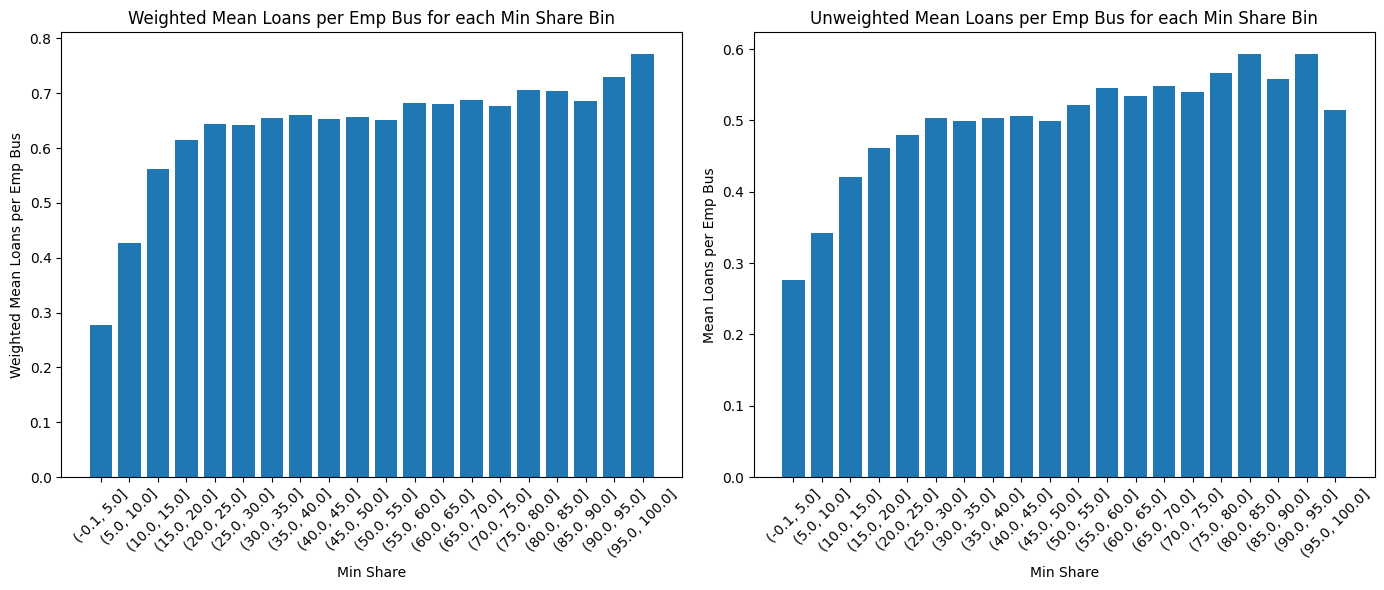

In [11]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus", "Total Pop")

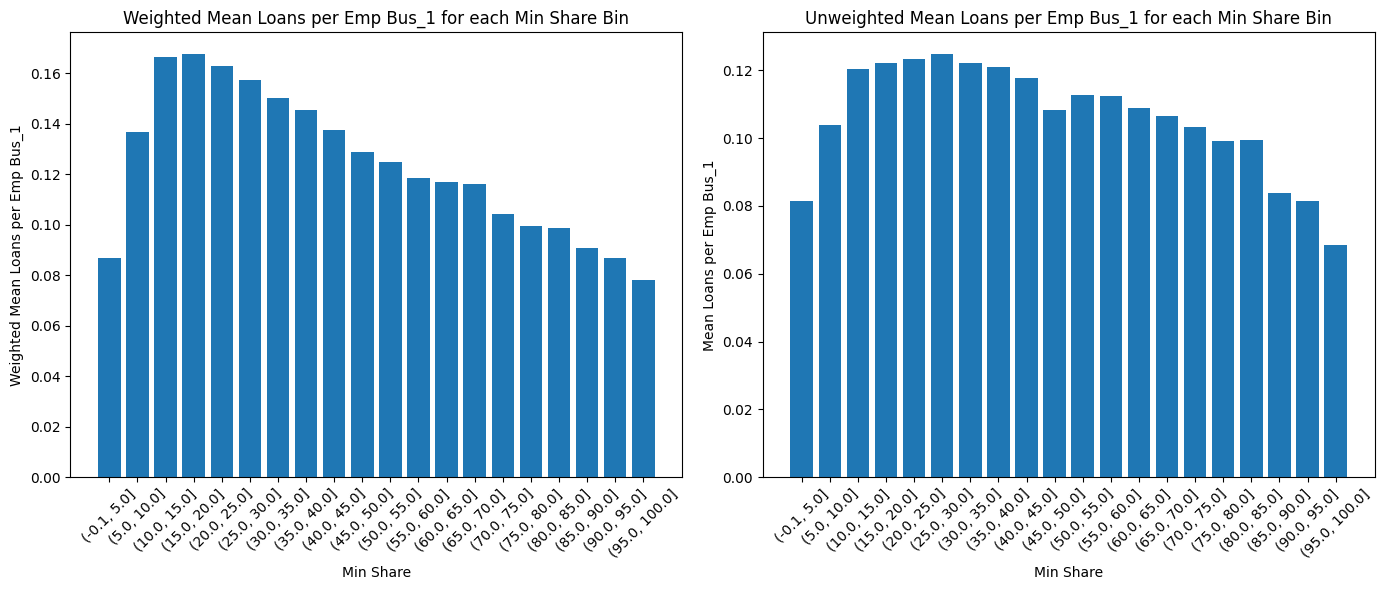

In [12]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_1", "Total Pop")

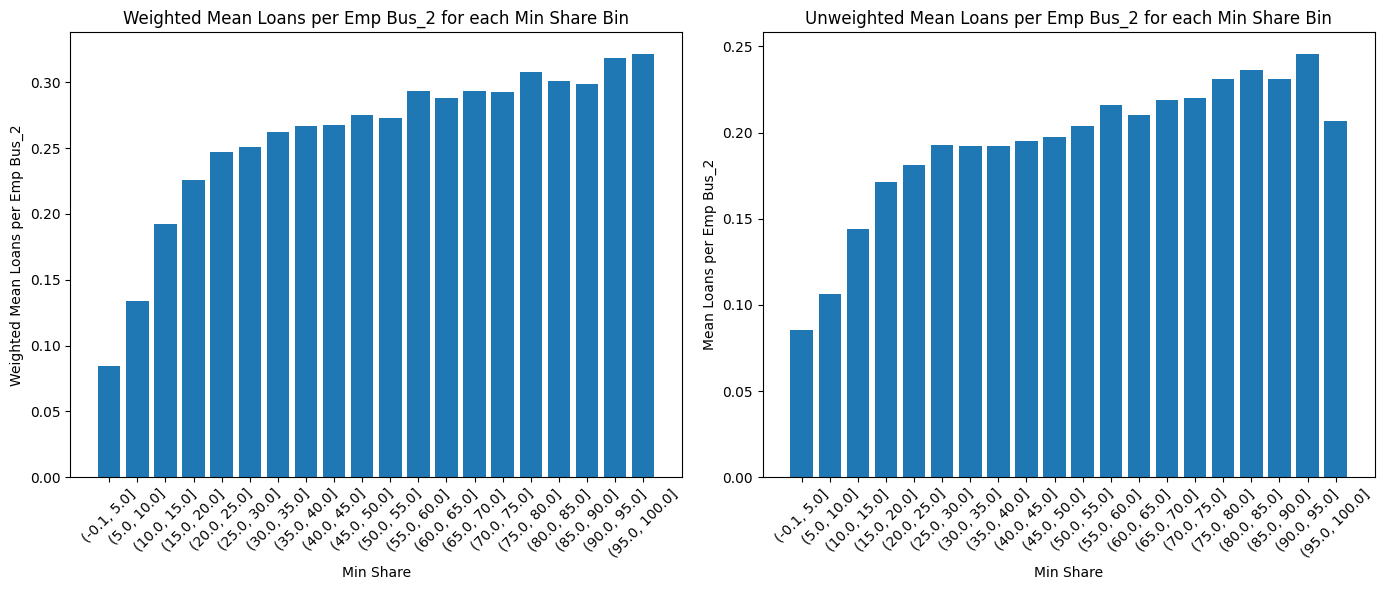

In [13]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_2", "Total Pop")

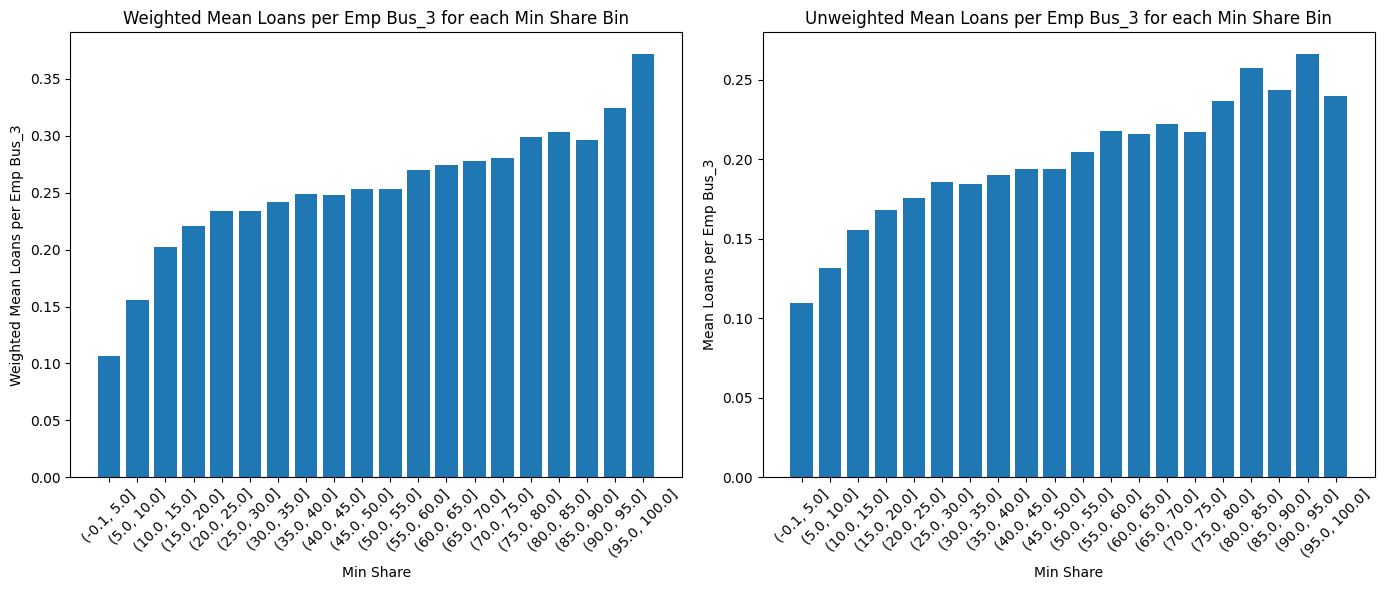

In [14]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_3", "Total Pop")

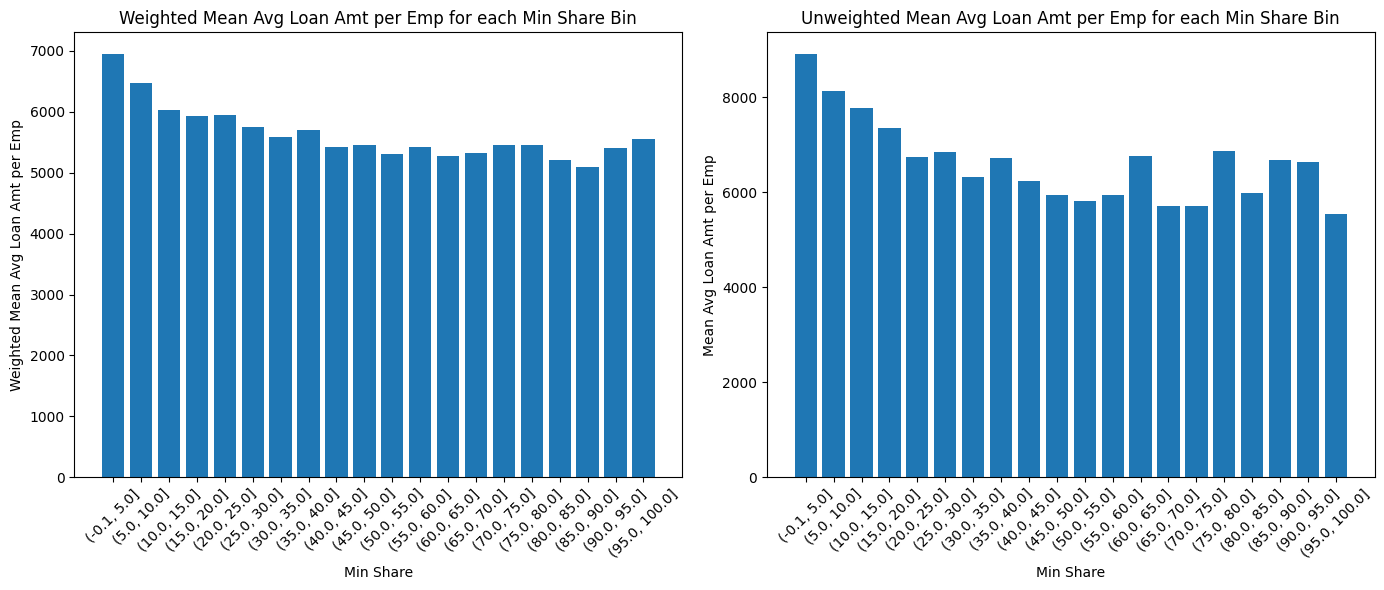

In [16]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp", "Total Pop")

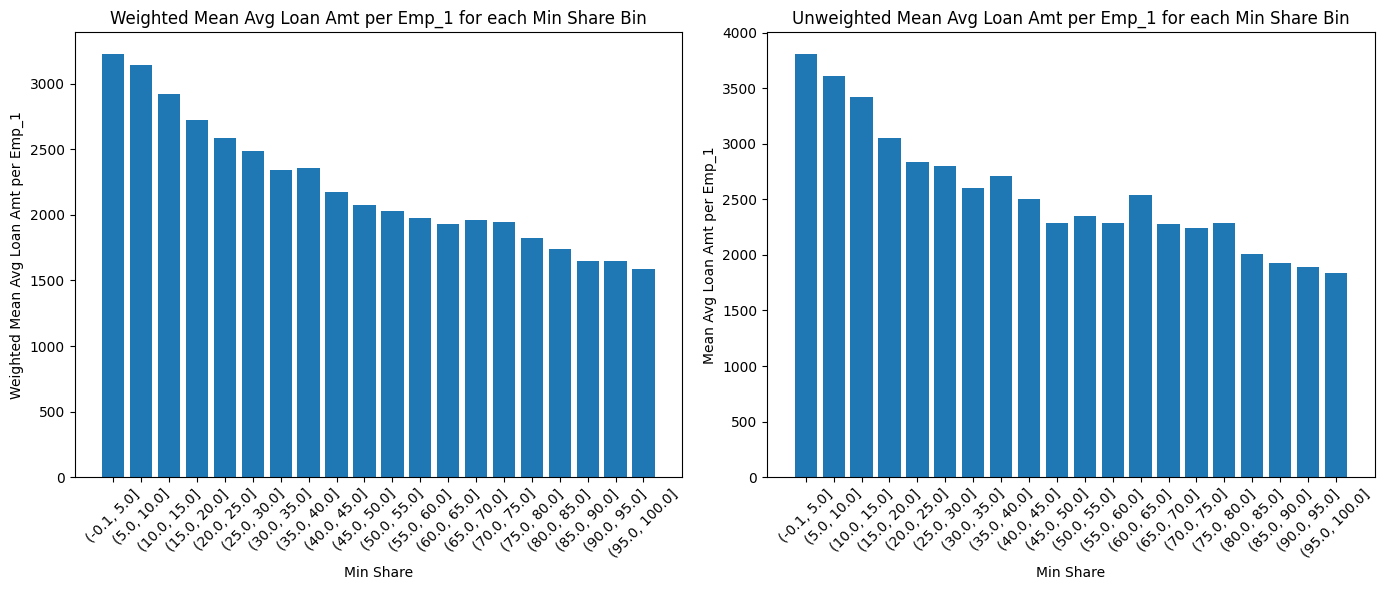

In [18]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_1", "Total Pop")

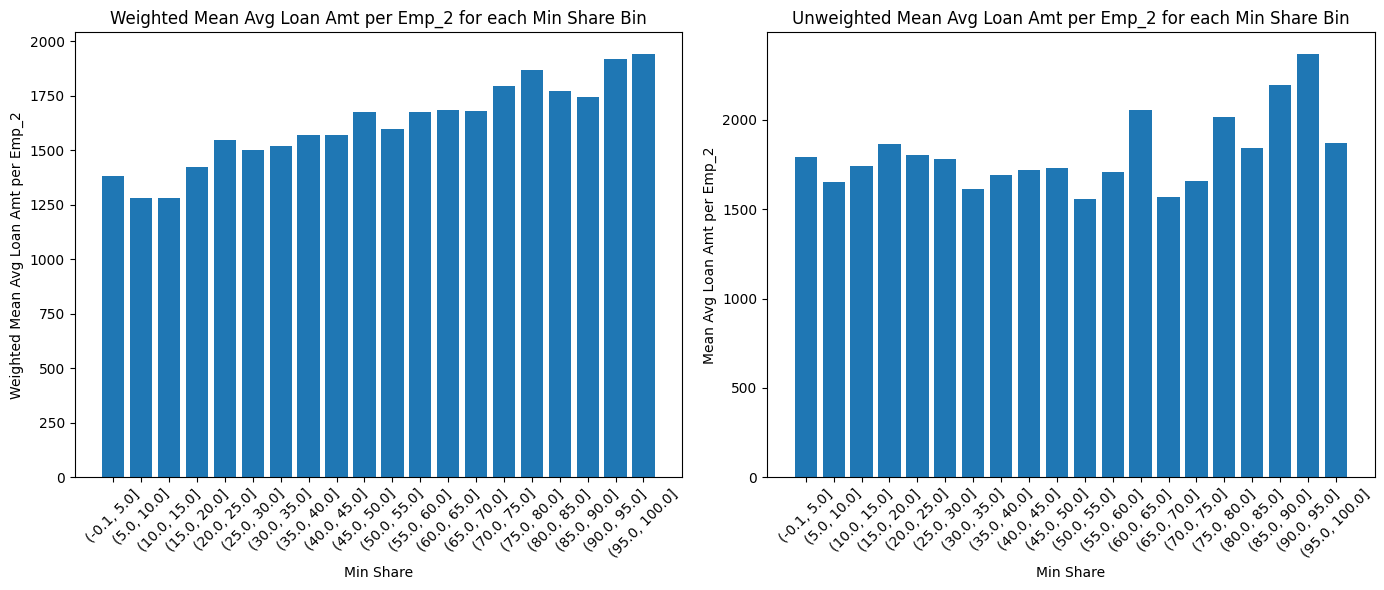

In [19]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_2", "Total Pop")

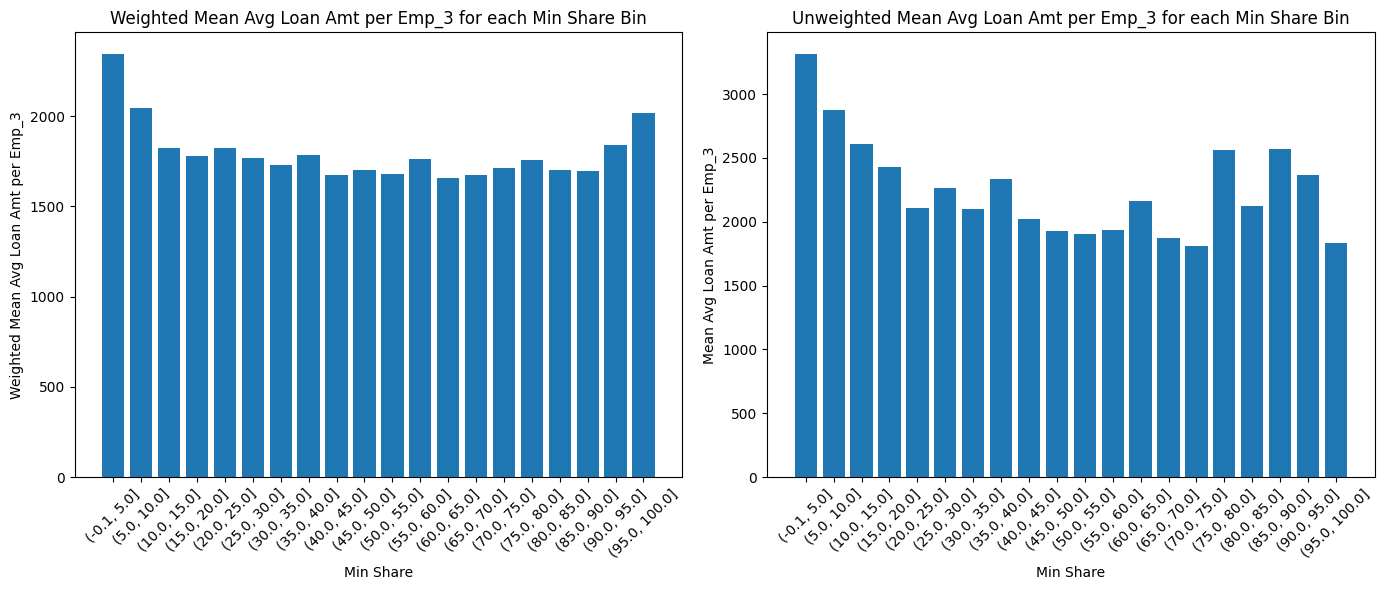

In [20]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_3", "Total Pop")

Race breakdowns

In [22]:
def plot_multi_binned_means(df, x_cols, y_col, weight_col):
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df = df.copy()
    
    # Drop NaN values for relevant columns
    cols_to_check = x_cols + [y_col, weight_col]
    df.dropna(subset=cols_to_check, inplace=True)
    
    # Initialize the figure
    plt.figure(figsize=(14, 6))
    
    # Loop for Unweighted and Weighted
    for i, calc_type in enumerate(['Unweighted', 'Weighted']):
        
        plt.subplot(1, 2, i + 1)
        
        for x_col in x_cols:
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if calc_type == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            plt.plot(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], label=f'{x_col} ({calc_type})')
            
        plt.xticks(rotation=45)
        plt.xlabel('Bins')
        plt.ylabel(f'{calc_type} Mean {y_col}')
        plt.title(f'{calc_type} Mean {y_col} for Multiple X Variables')
        plt.legend()

    plt.tight_layout()
    plt.show()


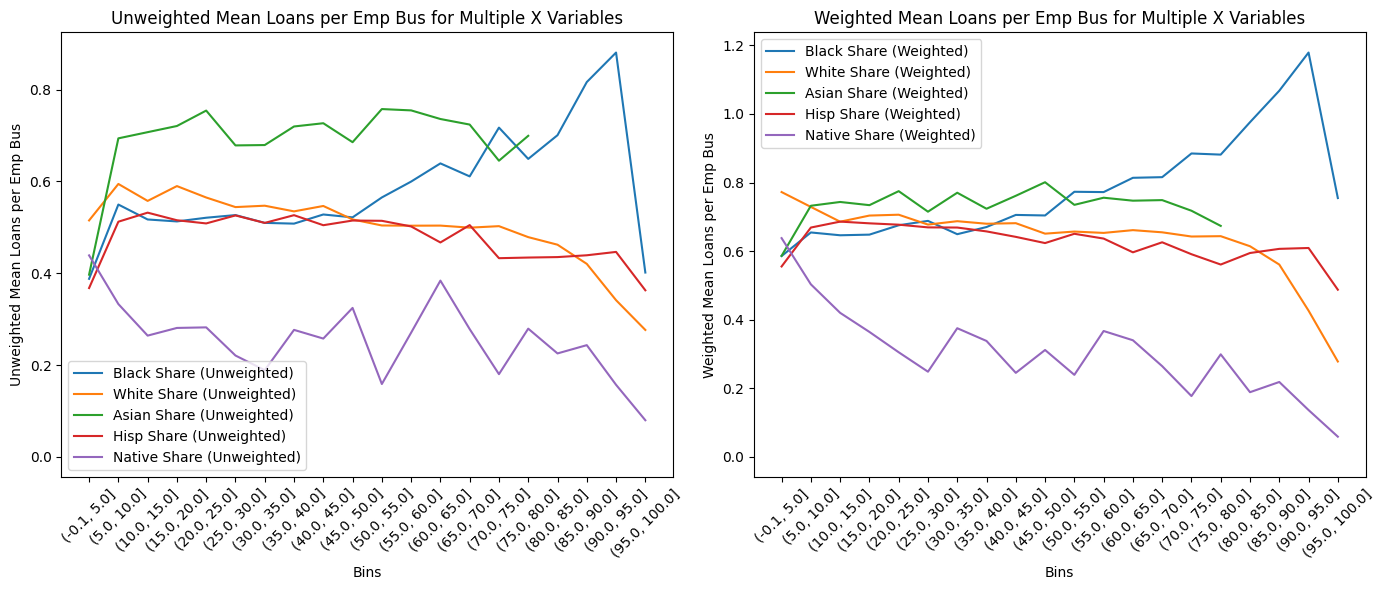

In [23]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus", "Total Pop")

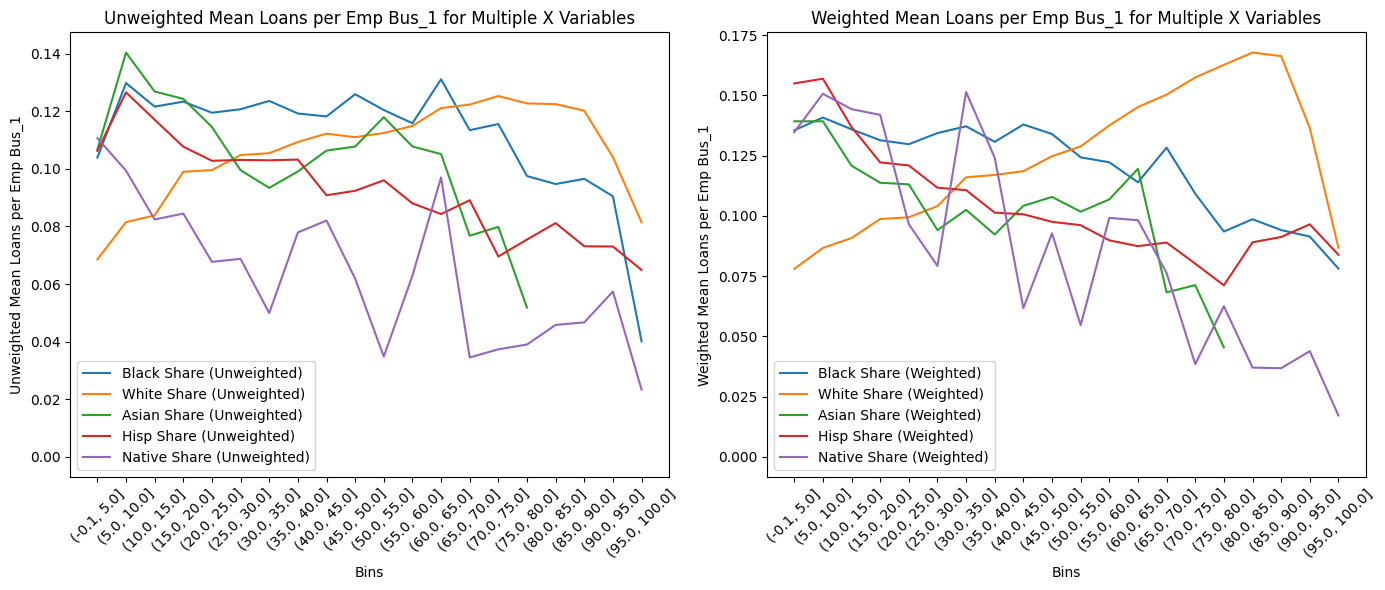

In [24]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_1", "Total Pop")

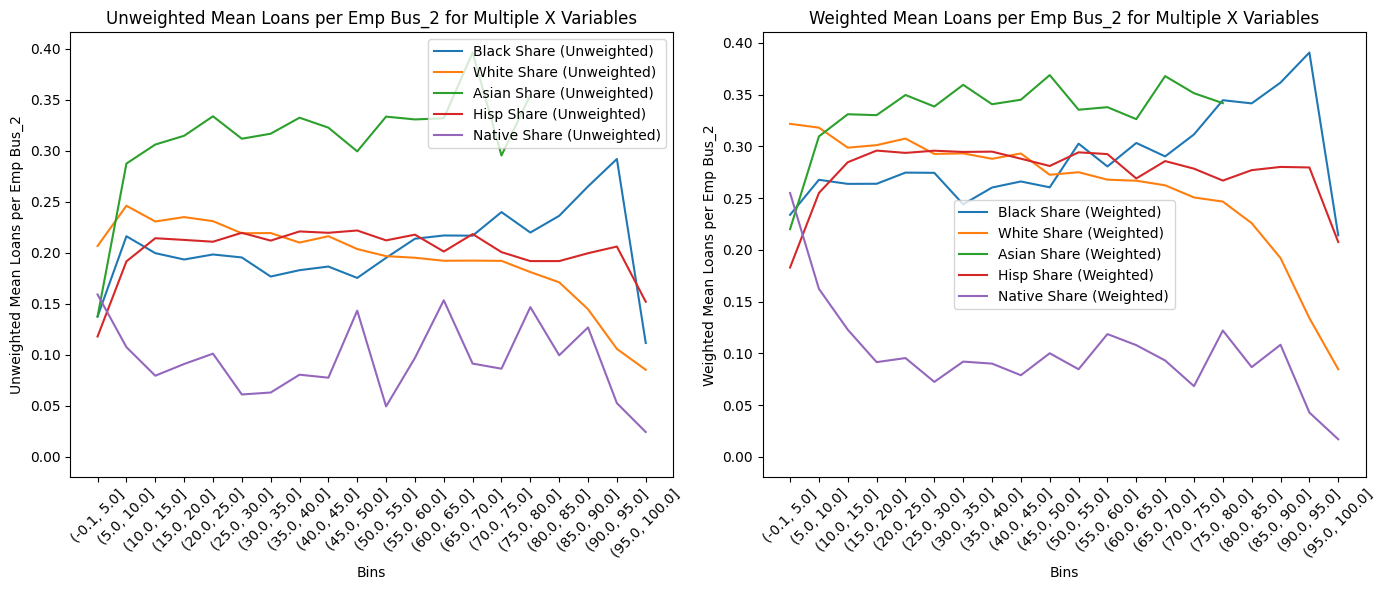

In [25]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_2", "Total Pop")

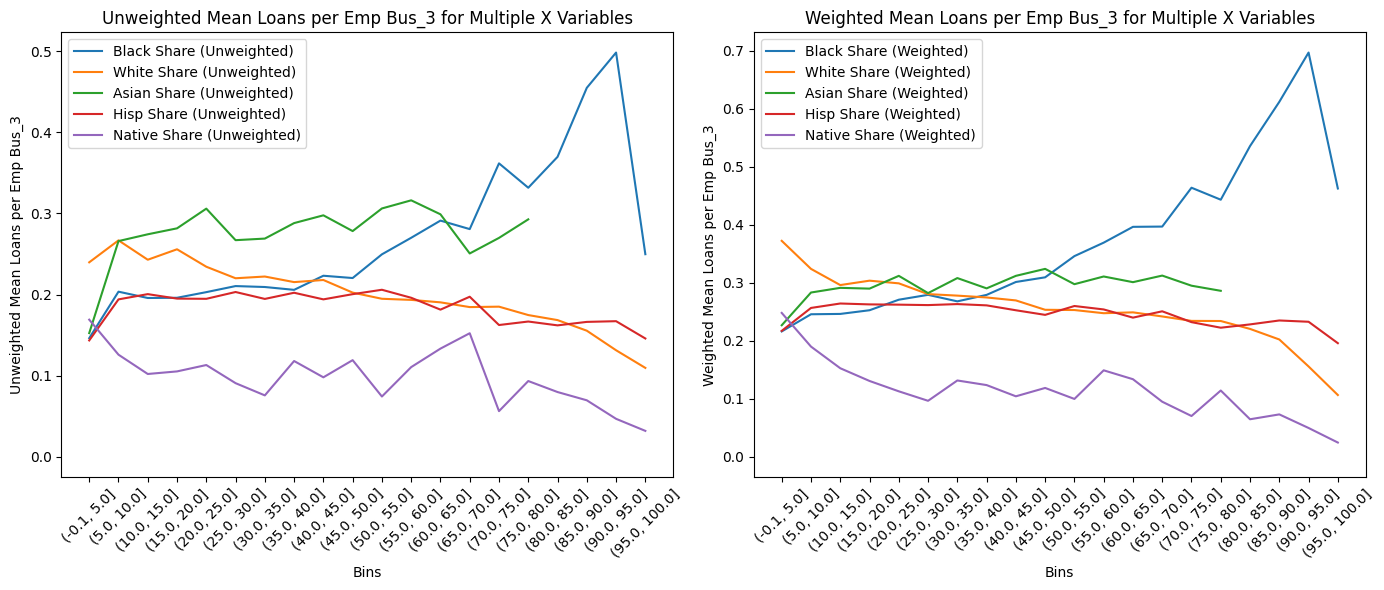

In [26]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_3", "Total Pop")

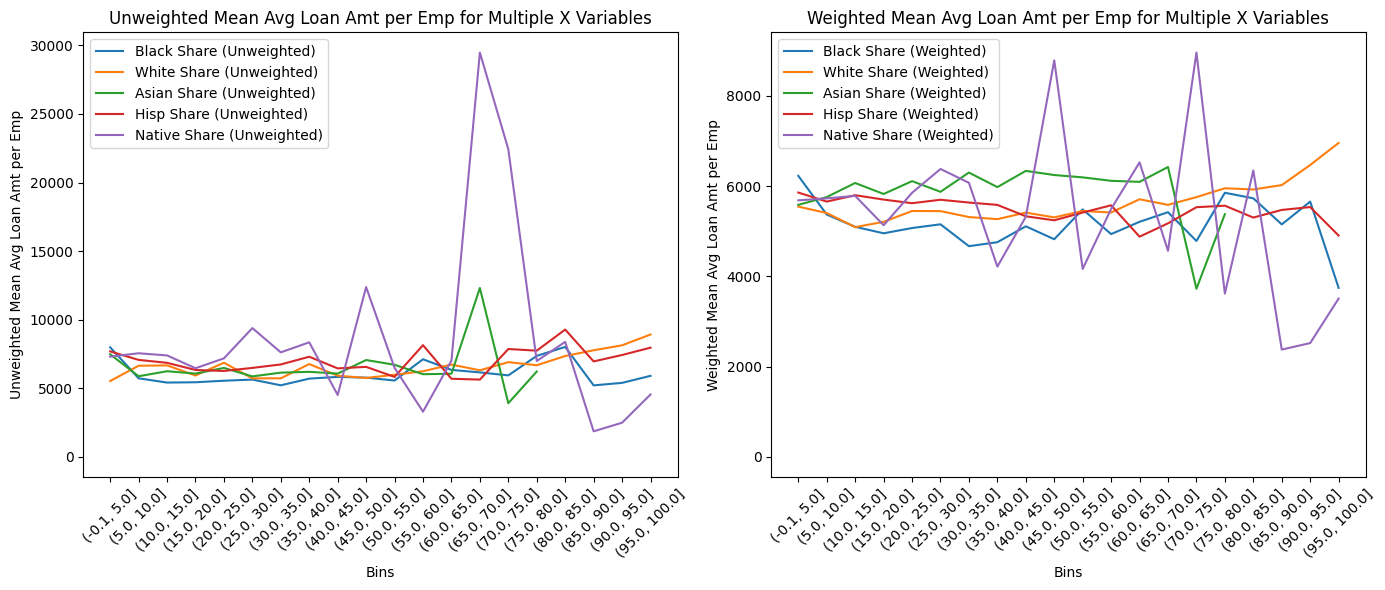

In [27]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp", "Total Pop")

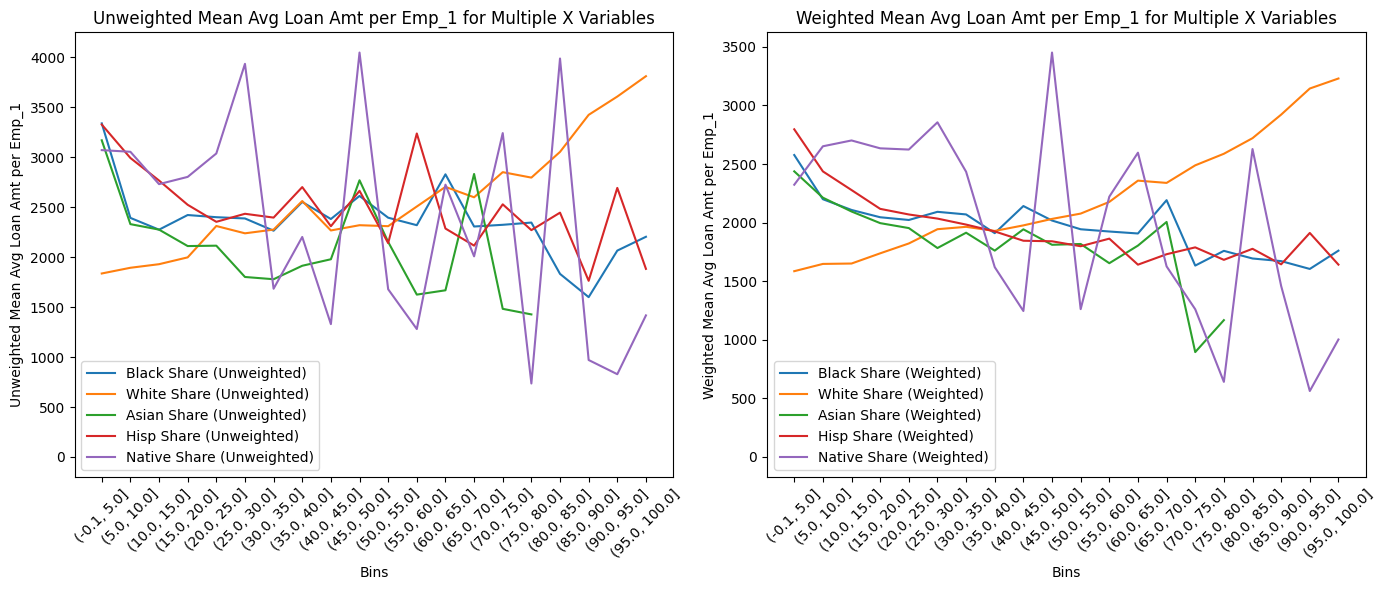

In [28]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_1", "Total Pop")

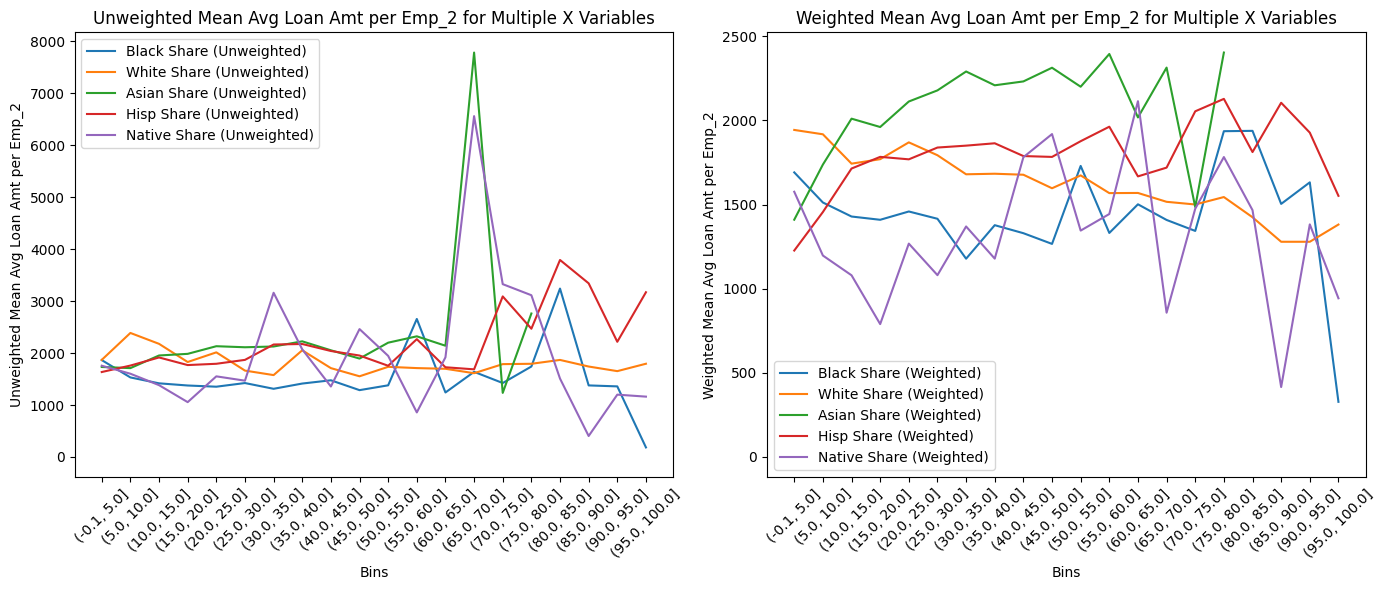

In [29]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_2", "Total Pop")

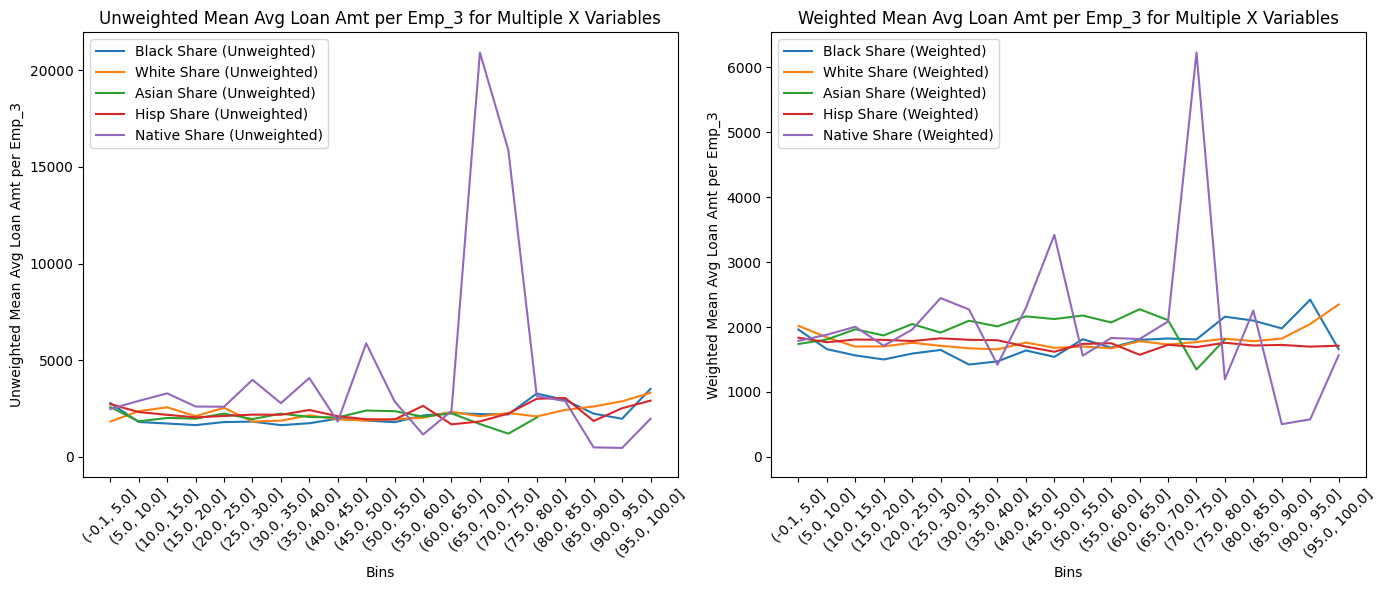

In [30]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_3", "Total Pop")

All Three Together

In [31]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, color_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, color_col])
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if measure == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Calculate the weighted average of the color column for each bin
            df['WeightedColor'] = df[color_col] * df[weight_col]
            color_grouped = df.groupby(bin_label).apply(lambda x: x['WeightedColor'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted {color_col}')
            
            # Using ax.bar to create bar charts with normalized colors
            cmap = sns.color_palette("coolwarm", as_cmap=True)
            normed_color = (color_grouped[f'Weighted {color_col}'] - color_grouped[f'Weighted {color_col}'].min()) / (color_grouped[f'Weighted {color_col}'].max() - color_grouped[f'Weighted {color_col}'].min())
            ax.bar(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], color=cmap(normed_color), label=f'{x_col} ({measure})')
            
            # Perform quadratic regression
            x_data = np.arange(len(grouped[bin_label]))
            y_data = grouped[grouped.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
            ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(grouped[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                # Setting different y-limits for unweighted and weighted rows
                ax.set_ylim(y_limits[j])
                
            ax.legend()
    
    plt.tight_layout()
    plt.show()

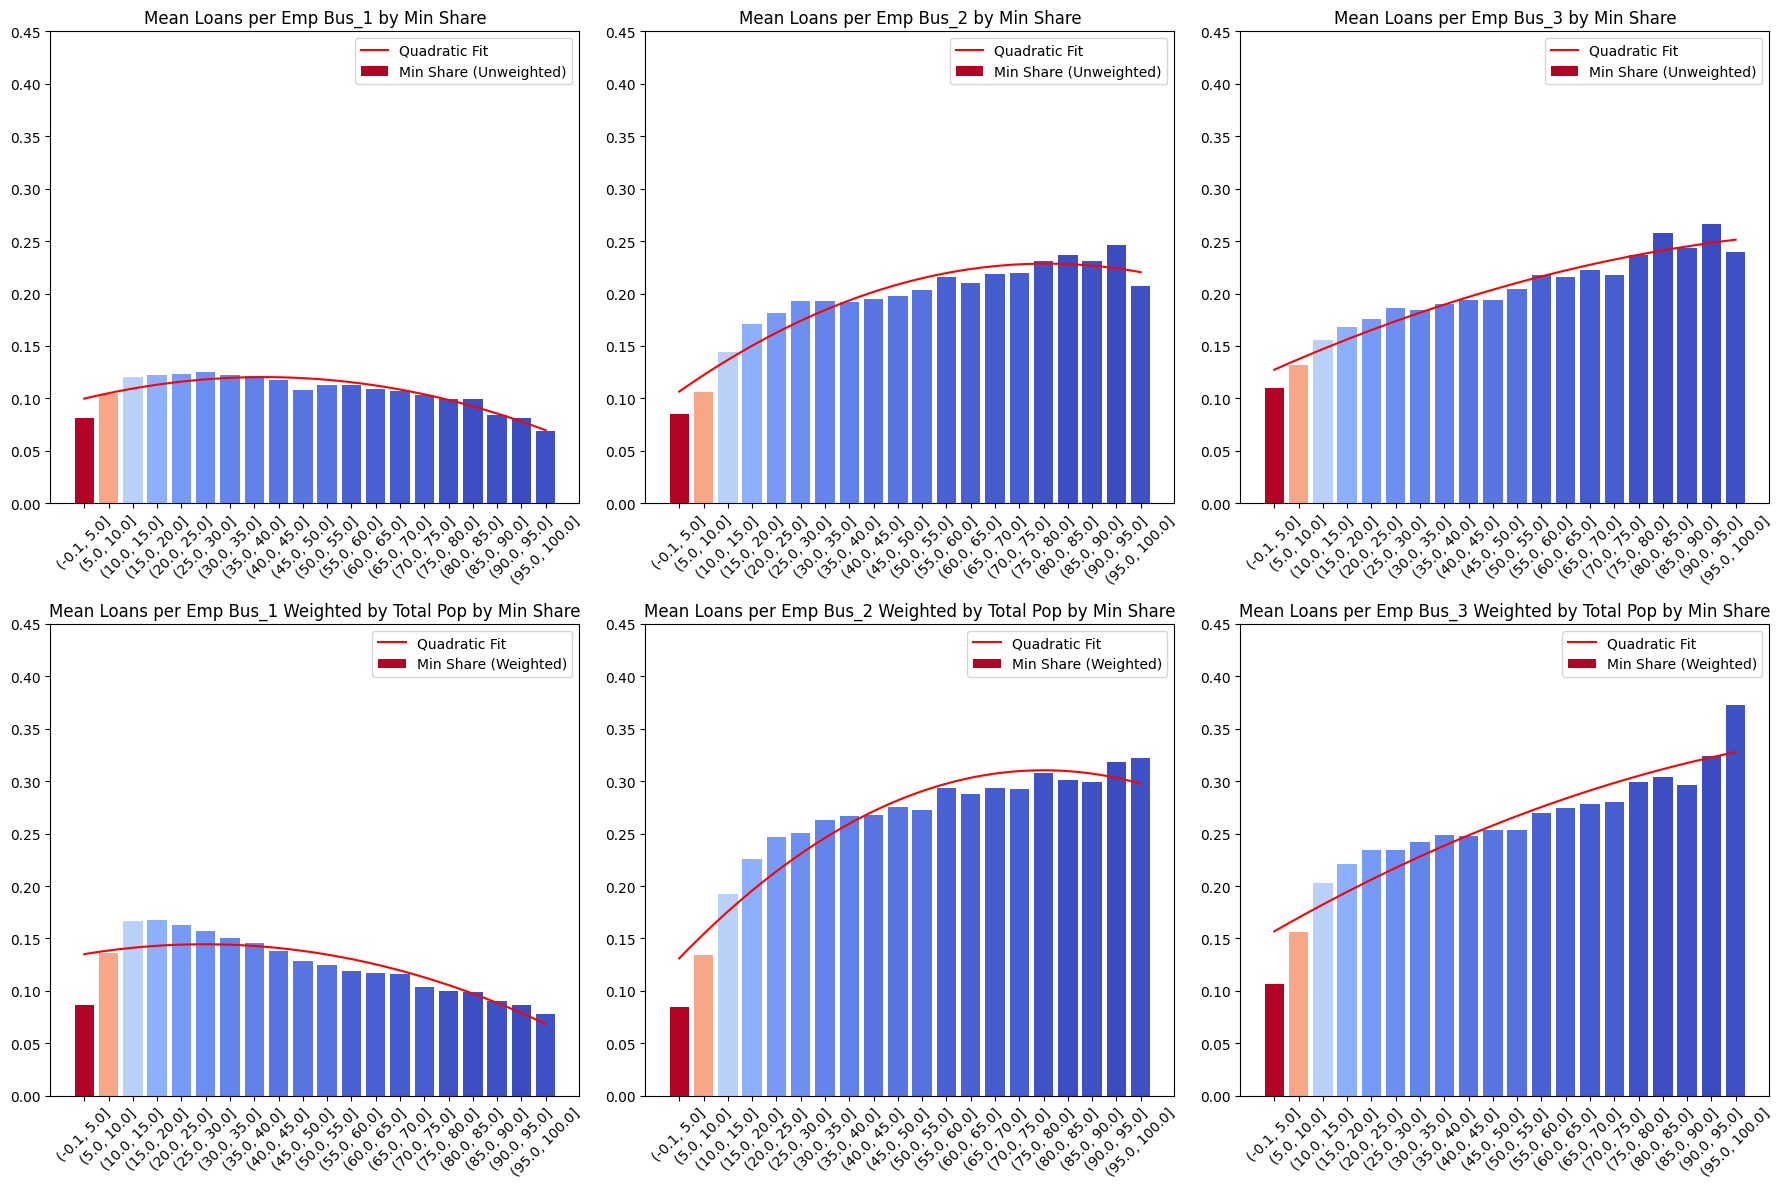

In [32]:
plot_multi_binned_means(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', "Rural", y_limits=[[0, 0.45], [0, 0.45]])

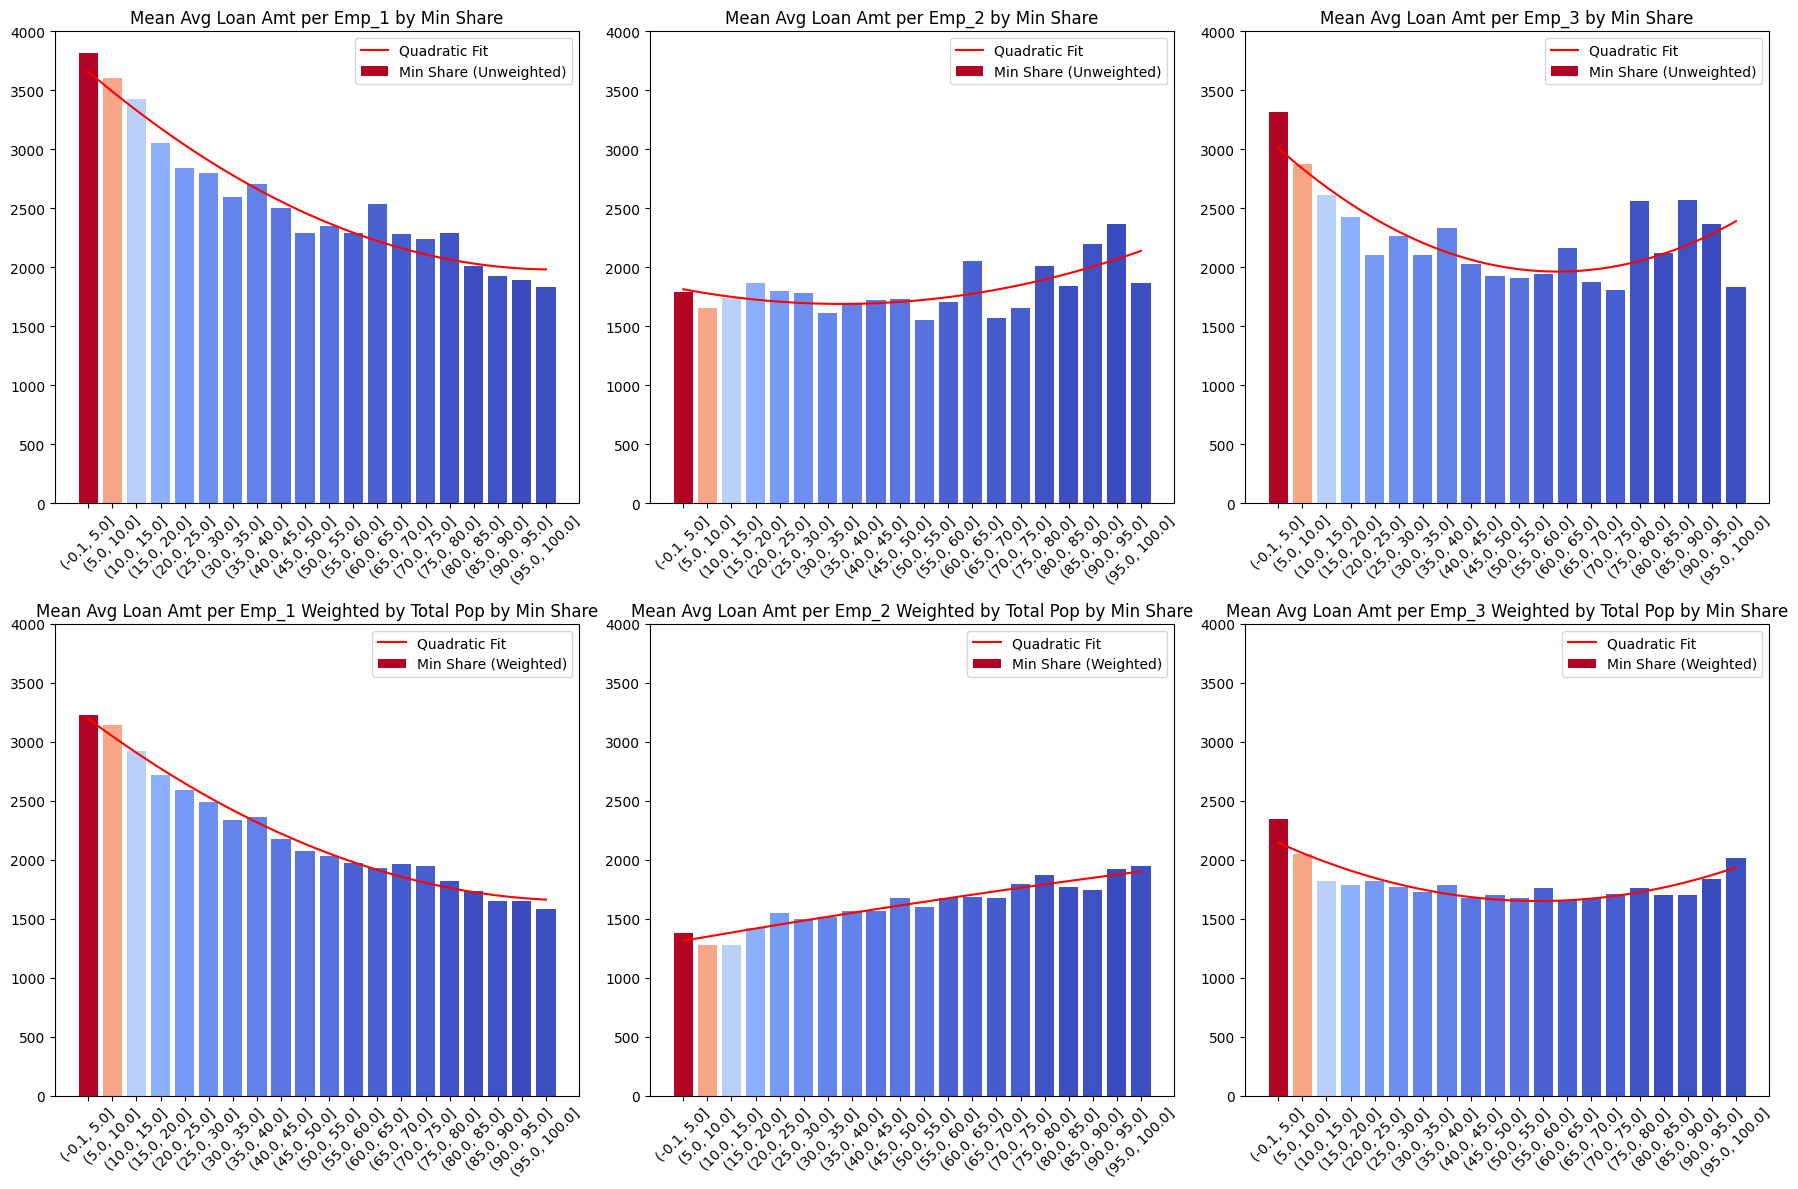

In [33]:
# Use the function to create the plots
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3'], 'Total Pop', "Rural", y_limits=[[0, 4000], [0, 4000]])

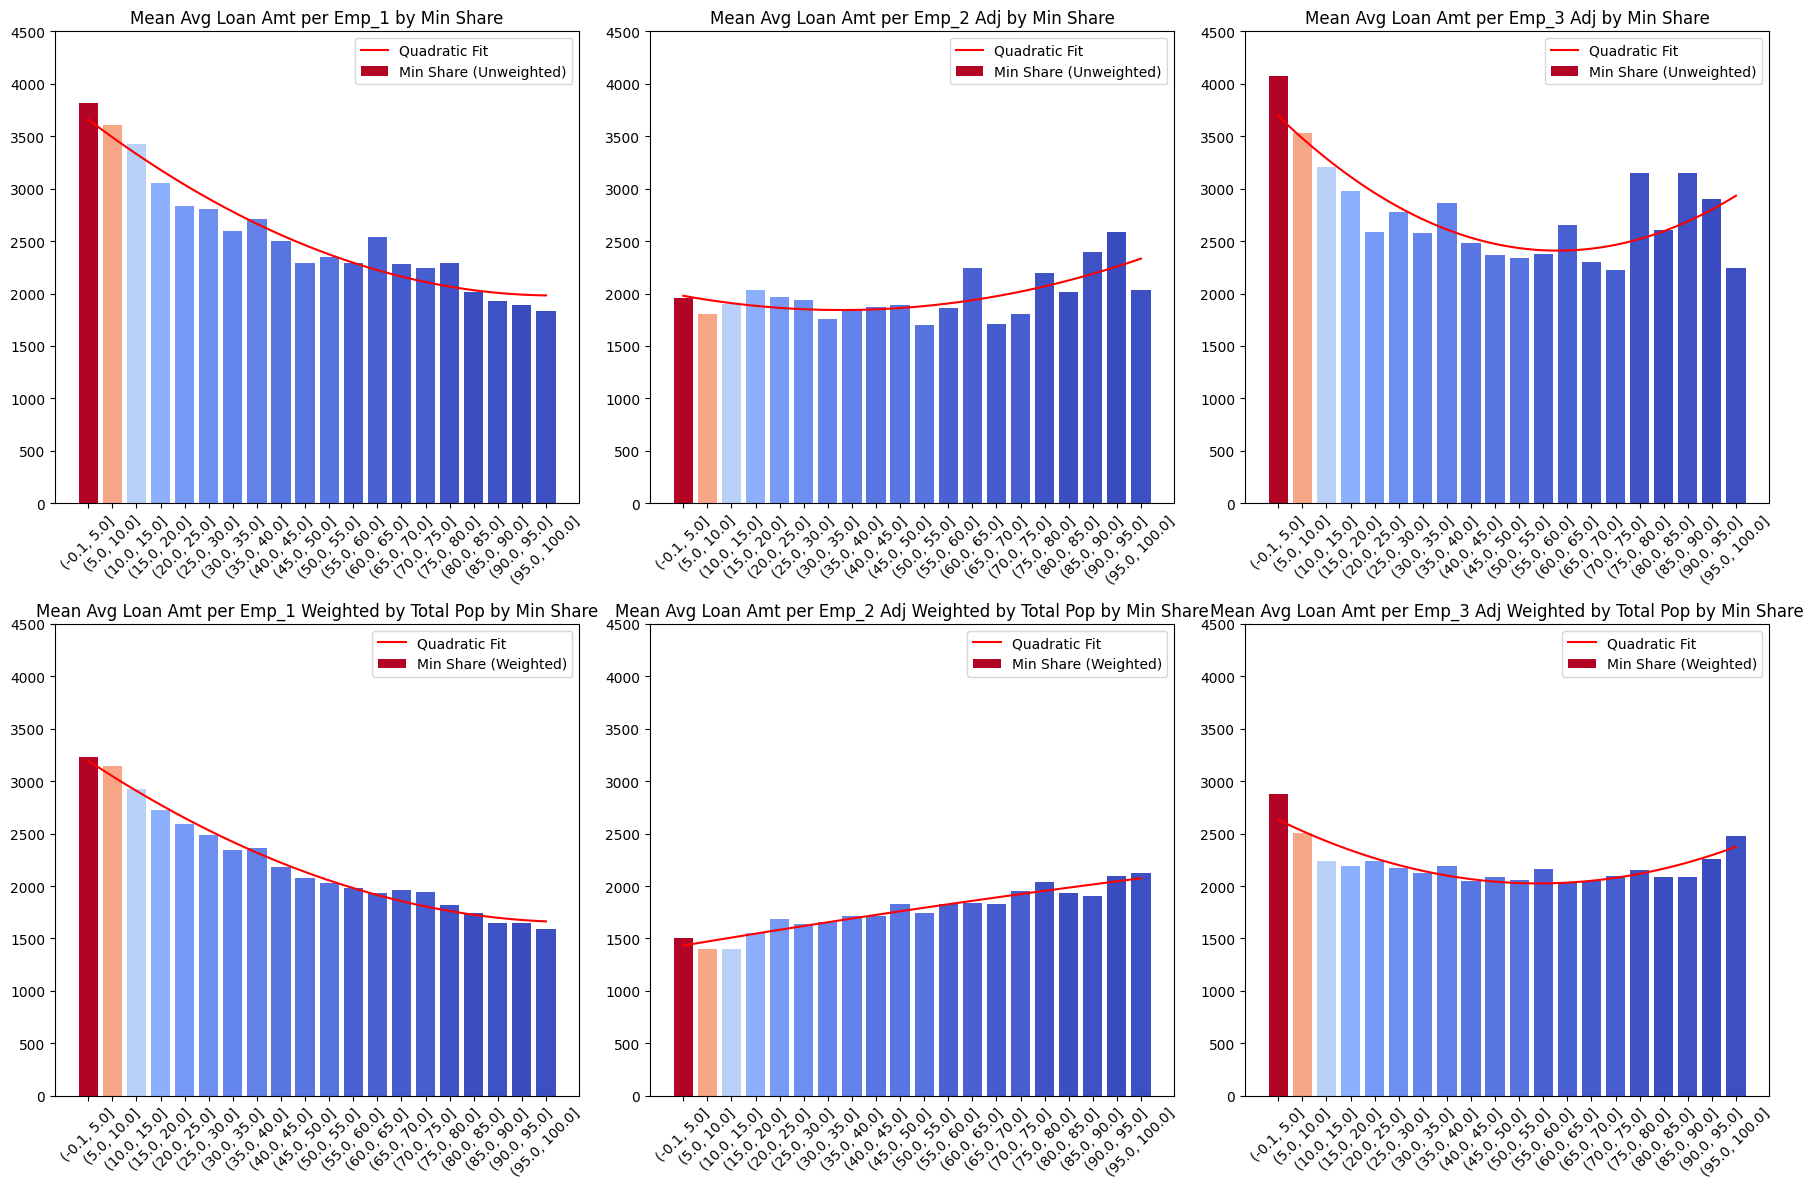

In [34]:
#Adjusted Rounds
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj'], 'Total Pop', "Rural", y_limits=[[0, 4500], [0, 4500]])

In [35]:
def plot_multi_binned_means_single_chart(df, x_col, y_cols, weight_col, y_limits=None):
    # Initialize the figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col])
    
    for j, measure in enumerate(['Unweighted', 'Weighted']):
        ax = axes[j]
        
        for i, y_col in enumerate(y_cols):
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if measure == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            ax.plot(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], label=f'{y_col} ({measure})')
        
        ax.set_xticklabels(grouped[bin_label].astype(str), rotation=45)
        title = f'Mean Loans per Employer by {x_col} ({measure})'
        ax.set_title(title)
        ax.legend()
        
        if y_limits:
            ax.set_ylim(y_limits[j])
    
    plt.tight_layout()
    plt.show()

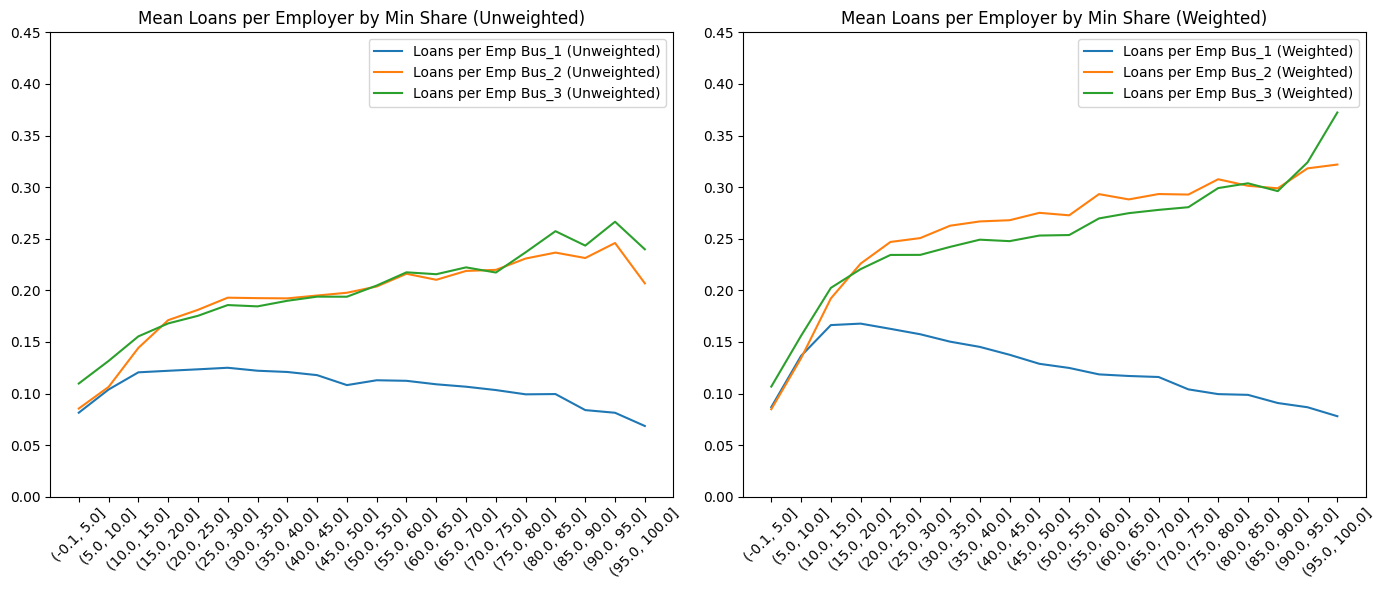

In [36]:
plot_multi_binned_means_single_chart(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', y_limits=[[0, 0.45], [0, 0.45]])

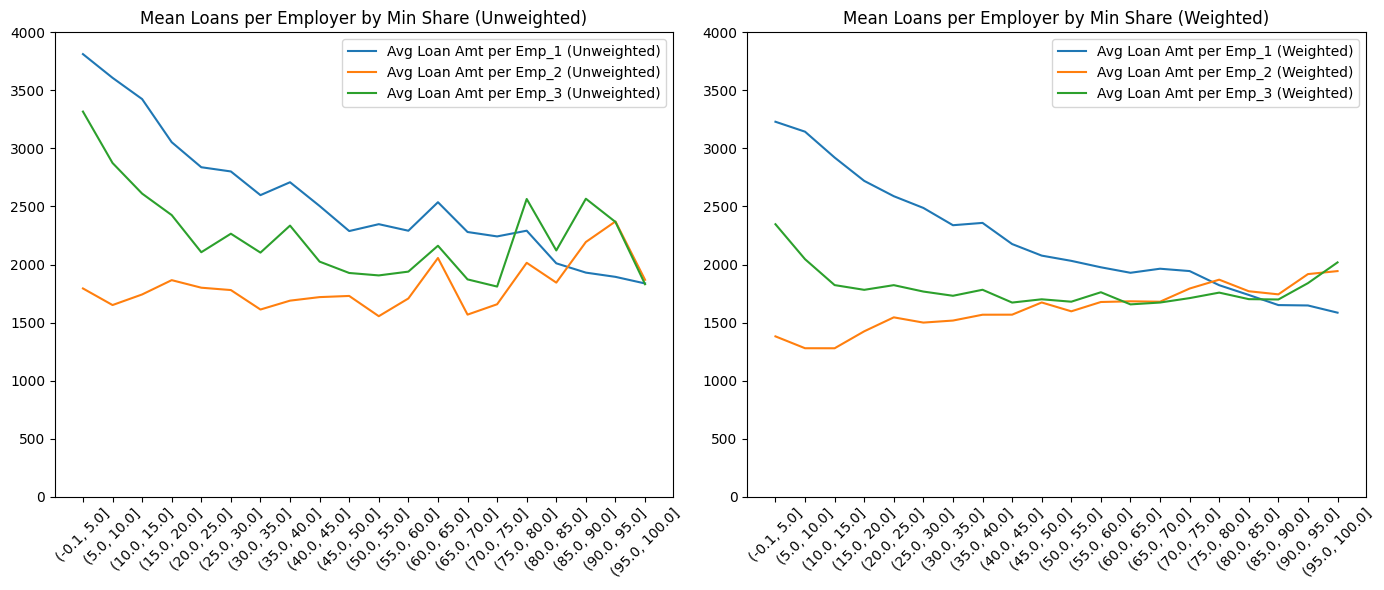

In [37]:
plot_multi_binned_means_single_chart(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3'], 'Total Pop', y_limits=[[0, 4000], [0, 4000]])

In [38]:
from scipy.stats import ttest_ind
import itertools

def ttest_quartiles(df, sorting_col):
    results = []
    columns = [col for col in df.columns if col != sorting_col]

    # Sort DataFrame based on the sorting column
    df_sorted = df.sort_values(by=sorting_col).dropna()

    n = len(df_sorted)

    # Generate all unique pairs of columns for t-testing
    pairs = list(itertools.combinations(columns, 2))

    for col1, col2 in pairs:
        # Compute quartiles for each column based on the sorted DataFrame
        quartiles_col1 = [
            df_sorted[col1][:n // 4],
            df_sorted[col1][n // 4: n // 2],
            df_sorted[col1][n // 2: 3 * n // 4],
            df_sorted[col1][3 * n // 4:]
        ]

        quartiles_col2 = [
            df_sorted[col2][:n // 4],
            df_sorted[col2][n // 4: n // 2],
            df_sorted[col2][n // 2: 3 * n // 4],
            df_sorted[col2][3 * n // 4:]
        ]

        # Perform t-tests for each quartile
        for i, (q1, q2) in enumerate(zip(quartiles_col1, quartiles_col2)):
            mean_diff = q1.mean() - q2.mean()
            _, p_value = ttest_ind(q1, q2, nan_policy='omit')
            results.append({
                'Column Pair': f"{col1} vs {col2}",
                'Quartile': i + 1,
                'Mean Difference': mean_diff,
                'P-Value': p_value,
                'Mean Col1': q1.mean(),
                'Mean Col2': q2.mean(),
                'Std Dev Col1': q1.std(),
                'Std Dev Col2': q2.std()
            })

    # Convert the results list to a DataFrame for better presentation
    results_df = pd.DataFrame(results)
    return results_df

In [39]:
df = stats_df[['Loans per Emp Bus_1', 
              'Loans per Emp Bus_2',
              'Loans per Emp Bus_3',
              'Min Share']].dropna()

results = ttest_quartiles(df, "Min Share")
results

Column Pair  Quartile  Mean Difference  \
0   Loans per Emp Bus_1 vs Loans per Emp Bus_2         1        -0.002866   
1   Loans per Emp Bus_1 vs Loans per Emp Bus_2         2        -0.017962   
2   Loans per Emp Bus_1 vs Loans per Emp Bus_2         3        -0.061224   
3   Loans per Emp Bus_1 vs Loans per Emp Bus_2         4        -0.106635   
4   Loans per Emp Bus_1 vs Loans per Emp Bus_3         1        -0.028173   
5   Loans per Emp Bus_1 vs Loans per Emp Bus_3         2        -0.033074   
6   Loans per Emp Bus_1 vs Loans per Emp Bus_3         3        -0.055330   
7   Loans per Emp Bus_1 vs Loans per Emp Bus_3         4        -0.111898   
8   Loans per Emp Bus_2 vs Loans per Emp Bus_3         1        -0.025307   
9   Loans per Emp Bus_2 vs Loans per Emp Bus_3         2        -0.015112   
10  Loans per Emp Bus_2 vs Loans per Emp Bus_3         3         0.005894   
11  Loans per Emp Bus_2 vs Loans per Emp Bus_3         4        -0.005264   

          P-Value  Mean Col1  Mean Col2  Std Dev Col1  Std Dev Col2  
0    9.966875e-02   0.091119   0.093985      0.106398      0.115788  
1    1.182350e-22   0.117906   0.135868      0.100950      0.131026  
2   5.604322e-229   0.123351   0.184574      0.093406      0.140174  
3    0.000000e+00   0.104648   0.211283      0.091351      0.151379  
4    4.576850e-57   0.091119   0.119292      0.106398      0.118454  
5    8.525349e-83   0.117906   0.150980      0.100950      0.116442  
6   5.293605e-226   0.123351   0.178681      0.093406      0.121519  
7    0.000000e+00   0.104648   0.216547      0.091351      0.159473  
8    4.453021e-43   0.093985   0.119292      0.115788      0.118454  
9    7.229097e-15   0.135868   0.150980      0.131026      0.116442  
10   4.114137e-03   0.184574   0.178681      0.140174      0.121519  
11   3.059733e-02   0.211283   0.216547      0.151379      0.159473

In [40]:
df = stats_df[['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3',
              'Min Share']].dropna()

results = ttest_quartiles(df, "Min Share")
results

Column Pair  Quartile  \
0   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         1   
1   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         2   
2   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         3   
3   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         4   
4   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         1   
5   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         2   
6   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         3   
7   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         4   
8   Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         1   
9   Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         2   
10  Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         3   
11  Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         4   

    Mean Difference        P-Value    Mean Col1    Mean Col2  Std Dev Col1  \
0       2027.707340   5.111140e-98  3698.404383  1670.697043   7926.547591   
1       1654.183485  1.861888e-114  3420.573934  1766.390449   5302.559757   
2       1077.037681   4.565371e-79  2842.025282  1764.987601   3771.871314   
3        470.717268   1.048869e-12  2264.304623  1793.587355   3709.083762   
4        668.604605   6.304588e-10  3698.404383  3029.799778   7926.547591   
5        707.311480   7.967376e-16  3420.573934  2713.262454   5302.559757   
6        614.822785   2.825136e-27  2842.025282  2227.202497   3771.871314   
7        218.618901   1.265378e-03  2264.304623  2045.685722   3709.083762   
8      -1359.102736   1.189851e-89  1670.697043  3029.799778   2789.047241   
9       -946.872005   1.388679e-36  1766.390449  2713.262454   3451.744733   
10      -462.214896   1.411594e-18  1764.987601  2227.202497   3265.058559   
11      -252.098367   5.892909e-04  1793.587355  2045.685722   4446.750864   

    Std Dev Col2  
0    2789.047241  
1    3451.744733  
2    3265.058559  
3    4446.750864  
4    5197.281028  
5    5574.790146  
6    3244.352258  
7    4648.605205  
8    5197.281028  
9    5574.790146  
10   3244.352258  
11   4648.605205

In [41]:
df = stats_df[['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj',
              'Min Share']].dropna()

results = ttest_quartiles(df, "Min Share")
results

Column Pair  Quartile  \
0   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         1   
1   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         2   
2   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         3   
3   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         4   
4   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         1   
5   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         2   
6   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         3   
7   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         4   
8   Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         1   
9   Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         2   
10  Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         3   
11  Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         4   

    Mean Difference        P-Value    Mean Col1    Mean Col2  Std Dev Col1  \
0       1876.300421   1.051927e-82  3698.404383  1822.103962   7926.547591   
1       1494.104351   3.657591e-89  3420.573934  1926.469583   5302.559757   
2        917.085680   7.971537e-54  2842.025282  1924.939603   3771.871314   
3        308.173414   9.615828e-06  2264.304623  1956.131209   3709.083762   
4        -18.292006   8.746881e-01  3698.404383  3716.696389   7926.547591   
5         92.178164   3.501711e-01  3420.573934  3328.395770   5302.559757   
6        109.885839   7.881633e-02  2842.025282  2732.139443   3771.871314   
7       -245.165735   1.575108e-03  2264.304623  2509.470358   3709.083762   
8      -1894.592427  3.154009e-120  1822.103962  3716.696389   3041.804647   
9      -1401.926186   1.816682e-55  1926.469583  3328.395770   3764.559100   
10      -807.199841   6.776466e-40  1924.939603  2732.139443   3560.954490   
11      -553.339149   9.247404e-11  1956.131209  2509.470358   4849.737661   

    Std Dev Col2  
0    3041.804647  
1    3764.559100  
2    3560.954490  
3    4849.737661  
4    6375.574969  
5    6838.670513  
6    3979.890819  
7    5702.506912  
8    6375.574969  
9    6838.670513  
10   3979.890819  
11   5702.506912

In [42]:
stats_df.describe()

Min Share  Min Share Excl B   Black Share   White Share  \
count  33499.000000      33499.000000  33499.000000  33499.000000   
mean      26.023626         18.685290      7.338336     73.976374   
std       24.494465         19.567009     14.876679     24.494465   
min        0.000000          0.000000      0.000000      0.000000   
25%        7.683130          6.470686      0.267693     62.962963   
50%       16.176471         10.865439      1.015359     83.823529   
75%       37.037037         22.846588      6.392407     92.316870   
max      100.000000        100.000000    100.000000    100.000000   

        Asian Share    Hisp Share  Native Share         Rural         PC Inc  \
count  33499.000000  33499.000000  33499.000000  33499.000000   32632.000000   
mean       2.324945     10.069490      1.781742     64.657928   34101.708599   
std        5.771987     15.476348      9.249141     44.045218   16903.677372   
min        0.000000      0.000000      0.000000      0.000000     289.000000   
25%        0.153178      1.855783      0.083893      8.883458   24899.750000   
50%        0.511740      4.078116      0.221484    100.000000   30809.500000   
75%        1.729935     10.616700      0.521974    100.000000   38877.000000   
max      100.000000    100.000000    100.000000    100.000000  701688.000000   

               Gini  ...  Loans per Emp Bus  Avg Loan Amt per Emp  \
count  32275.000000  ...       32638.000000          30771.000000   
mean      41.131506  ...           0.432061           7309.194868   
std        8.172452  ...           0.304393          10019.553411   
min        0.020000  ...           0.000000              0.000000   
25%       37.320000  ...           0.200000           3452.051810   
50%       41.540000  ...           0.381164           5532.456152   
75%       45.720000  ...           0.634921           8482.814373   
max       82.760000  ...           6.000000         336934.333333   

       Loans per Emp Bus_1  Avg Loan Amt per Emp_1  Loans per Emp Bus_2  \
count         32638.000000            30771.000000         32638.000000   
mean              0.109256             3056.306189             0.156429   
std               0.098997             5480.280641             0.142527   
min               0.000000                0.000000             0.000000   
25%               0.041667             1026.714752             0.054054   
50%               0.093878             2147.066663             0.120000   
75%               0.157895             3645.794648             0.232393   
max               3.000000           331865.666667             4.000000   

       Avg Loan Amt per Emp_2  Loans per Emp Bus_3  Avg Loan Amt per Emp_3  \
count            30771.000000         32638.000000            30771.000000   
mean              1748.918154             0.166376             2503.970525   
std               3540.195425             0.135005             4765.052984   
min                  0.000000             0.000000                0.000000   
25%                491.124612             0.072464              867.355632   
50%               1092.791489             0.142857             1593.512000   
75%               2066.431891             0.239337             2757.000028   
max             229710.835000             2.090909           225840.500000   

       Avg Loan Amt per Emp_2 Adj  Avg Loan Amt per Emp_3 Adj  
count                30771.000000                30771.000000  
mean                  1907.413862                 3071.654528  
std                   3861.025635                 5845.354978  
min                      0.000000                    0.000000  
25%                    535.632780                 1063.996891  
50%                   1191.825718                 1954.782735  
75%                   2253.702281                 3382.049244  
max                 250528.379422               277041.597540  

[8 rows x 31 columns]

In [43]:
def perform_ttests(df, round1_col, round2_col, round3_col, minority_share_col):
    # Create quartile labels
    quartile_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
    
    # Cut the DataFrame into quartiles
    df['Quartile'] = pd.qcut(df[minority_share_col], 4, labels=quartile_labels)
    
    # Initialize result dictionary
    results = {}
    
    # Loop through each round to perform t-tests
    for round_col in [round1_col, round2_col, round3_col]:
        
        # Calculate average and standard deviation of funding for each quartile (ignoring NaNs)
        group_stats = df.groupby('Quartile')[round_col].agg(['mean', 'std'])
        
        # Initialize mean differences list
        mean_diffs = []
        
        # Perform t-tests between all combinations of quartiles (ignoring NaNs)
        for i, q1 in enumerate(quartile_labels):
            for j, q2 in enumerate(quartile_labels):
                if i >= j:
                    continue
                data1 = df[df['Quartile'] == q1][round_col].dropna()
                data2 = df[df['Quartile'] == q2][round_col].dropna()
                
                if data1.empty or data2.empty:
                    continue
                
                _, p_val = ttest_ind(data1, data2)
                mean_diff = data1.mean() - data2.mean()
                mean_diffs.append(f"{q1}-{q2}: Δ={mean_diff:.4f}, p={p_val:.4f}")
        
        # Store results in dictionary
        results[round_col] = {'Group Stats': group_stats, 'Mean Differences': mean_diffs}
    
    # Create output table
    output_table = pd.DataFrame(columns=['Round', 'Quartile', 'Avg. Funding', 'Std. Dev.', 'Mean Differences'])
    for round_col in [round1_col, round2_col, round3_col]:
        for quartile in quartile_labels:
            avg_funding = results[round_col]['Group Stats'].loc[quartile, 'mean']
            std_dev = results[round_col]['Group Stats'].loc[quartile, 'std']
            mean_diffs = ', '.join([d for d in results[round_col]['Mean Differences'] if quartile in d])
            output_table = output_table.append({'Round': round_col, 'Quartile': quartile, 'Avg. Funding': avg_funding, 'Std. Dev.': std_dev, 'Mean Differences': mean_diffs}, ignore_index=True)
    
    return output_table

In [44]:
df = stats_df[['Loans per Emp Bus_1', 'Loans per Emp Bus_2', 'Loans per Emp Bus_3', "Min Share"]].dropna()

out = perform_ttests(df, 'Loans per Emp Bus_1', 'Loans per Emp Bus_2', 'Loans per Emp Bus_3', "Min Share")
out.to_csv("Ttests.csv")

In [45]:
df = stats_df[['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3', "Min Share"]].dropna()

out = perform_ttests(df, 'Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3', "Min Share")
out.to_csv("Ttests.csv")

In [46]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, region_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, region_col])
    
    # Get unique regions
    unique_regions = df[region_col].unique()
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            # Calculate the total mean for each bin
            if measure == 'Weighted':
                df['Weighted'] = df[y_col] * df[weight_col]
                total_means = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                total_means = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Initialize the bottom array for stacked bars
            bottom = np.zeros(len(total_means))
            
            for region in unique_regions:
                region_df = df[df[region_col] == region]
                
                # Calculate the proportion of each region within each bin
                region_proportion = region_df.groupby(bin_label).size() / df.groupby(bin_label).size()
                region_proportion = region_proportion.reset_index(name=f'Proportion {region}')
                
                # Calculate the height of the bar section for the current region
                bar_section_height = region_proportion[f'Proportion {region}'] * total_means[total_means.columns[-1]]
                
                # Add the stacked bar section for the current region
                ax.bar(total_means[bin_label].astype(str), bar_section_height, bottom=bottom, label=f'{region} ({measure})')
                bottom += bar_section_height.values
            
            # Perform quadratic regression on the total means
            x_data = np.arange(len(total_means[bin_label]))
            y_data = total_means[total_means.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
            ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(total_means[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                ax.set_ylim(y_limits[j])
                
            ax.legend()
    
    plt.tight_layout()
    plt.show()

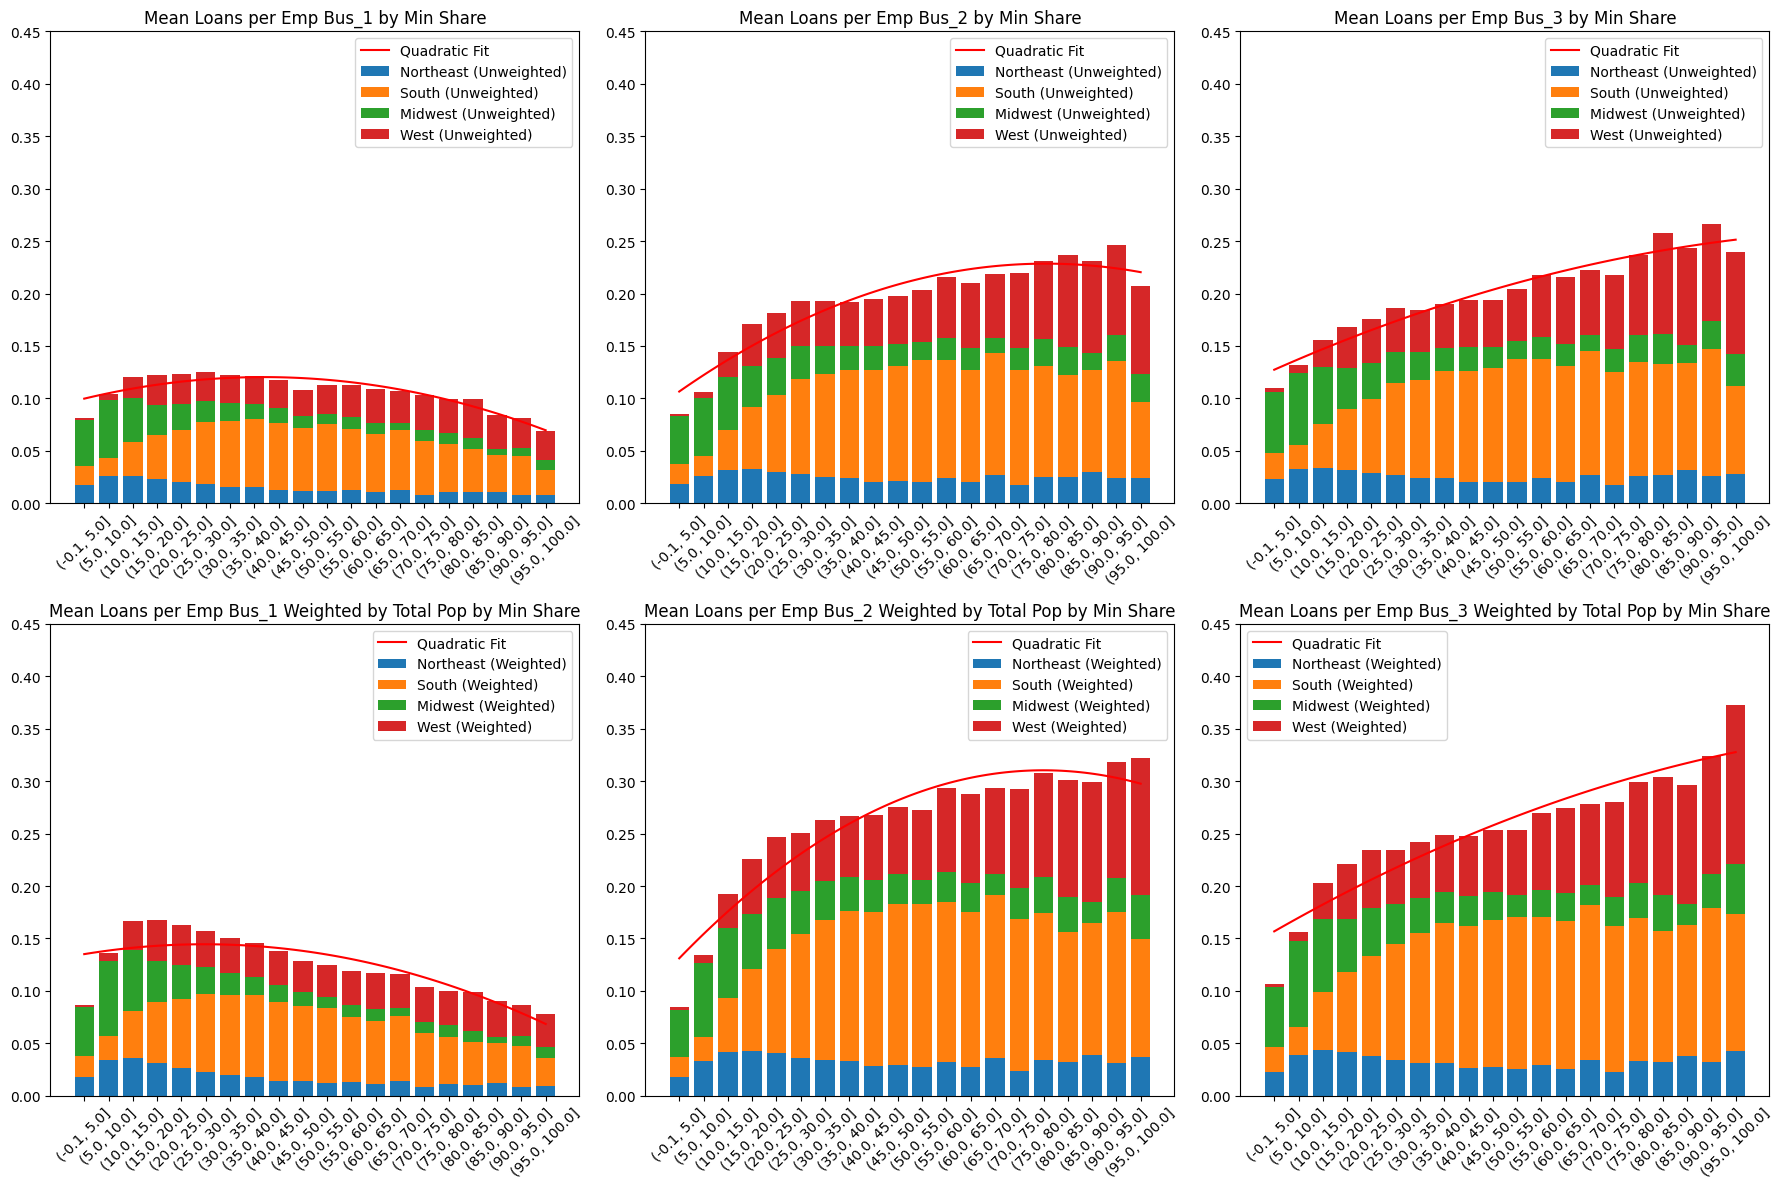

In [47]:
plot_multi_binned_means(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', "Census Region", y_limits=[[0, 0.45], [0, 0.45]])

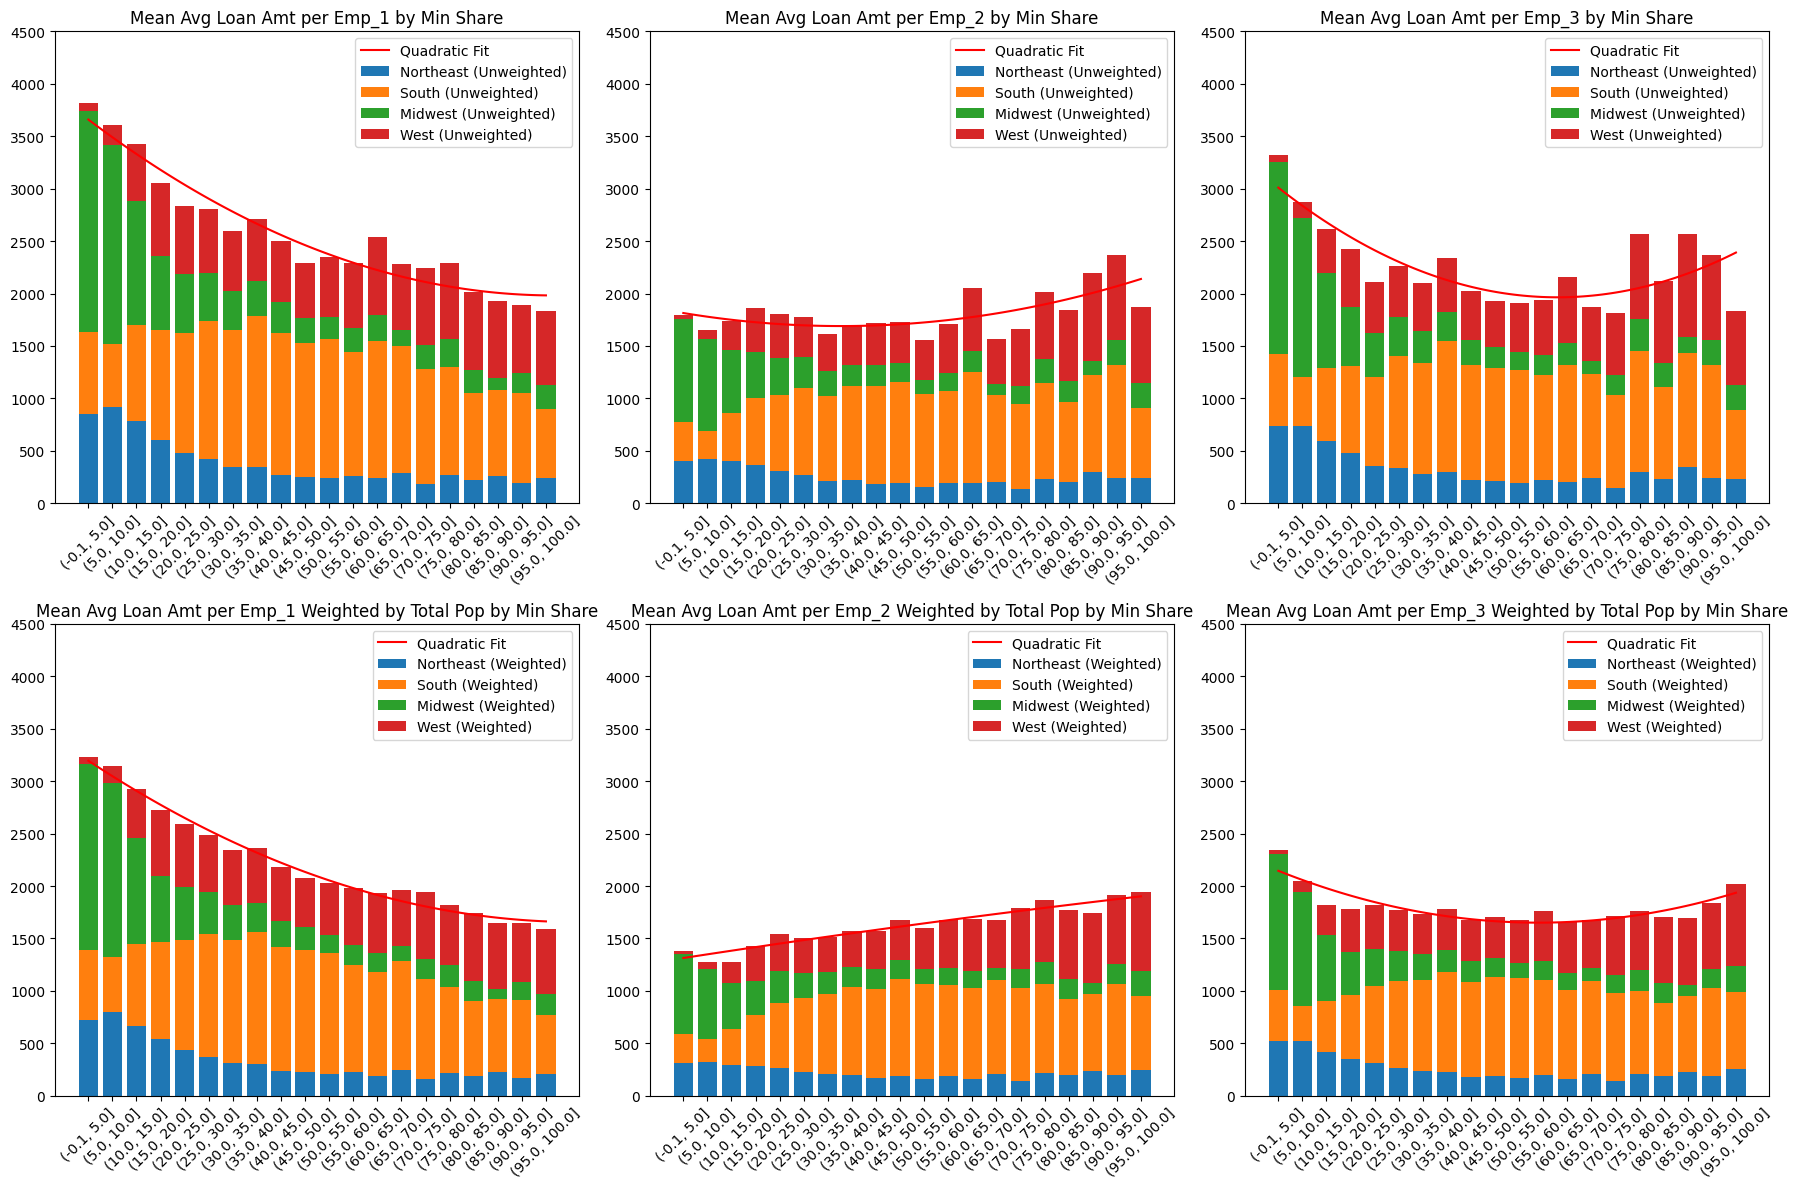

In [48]:
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3'], 'Total Pop', "Census Region", y_limits=[[0, 4500], [0, 4500]])

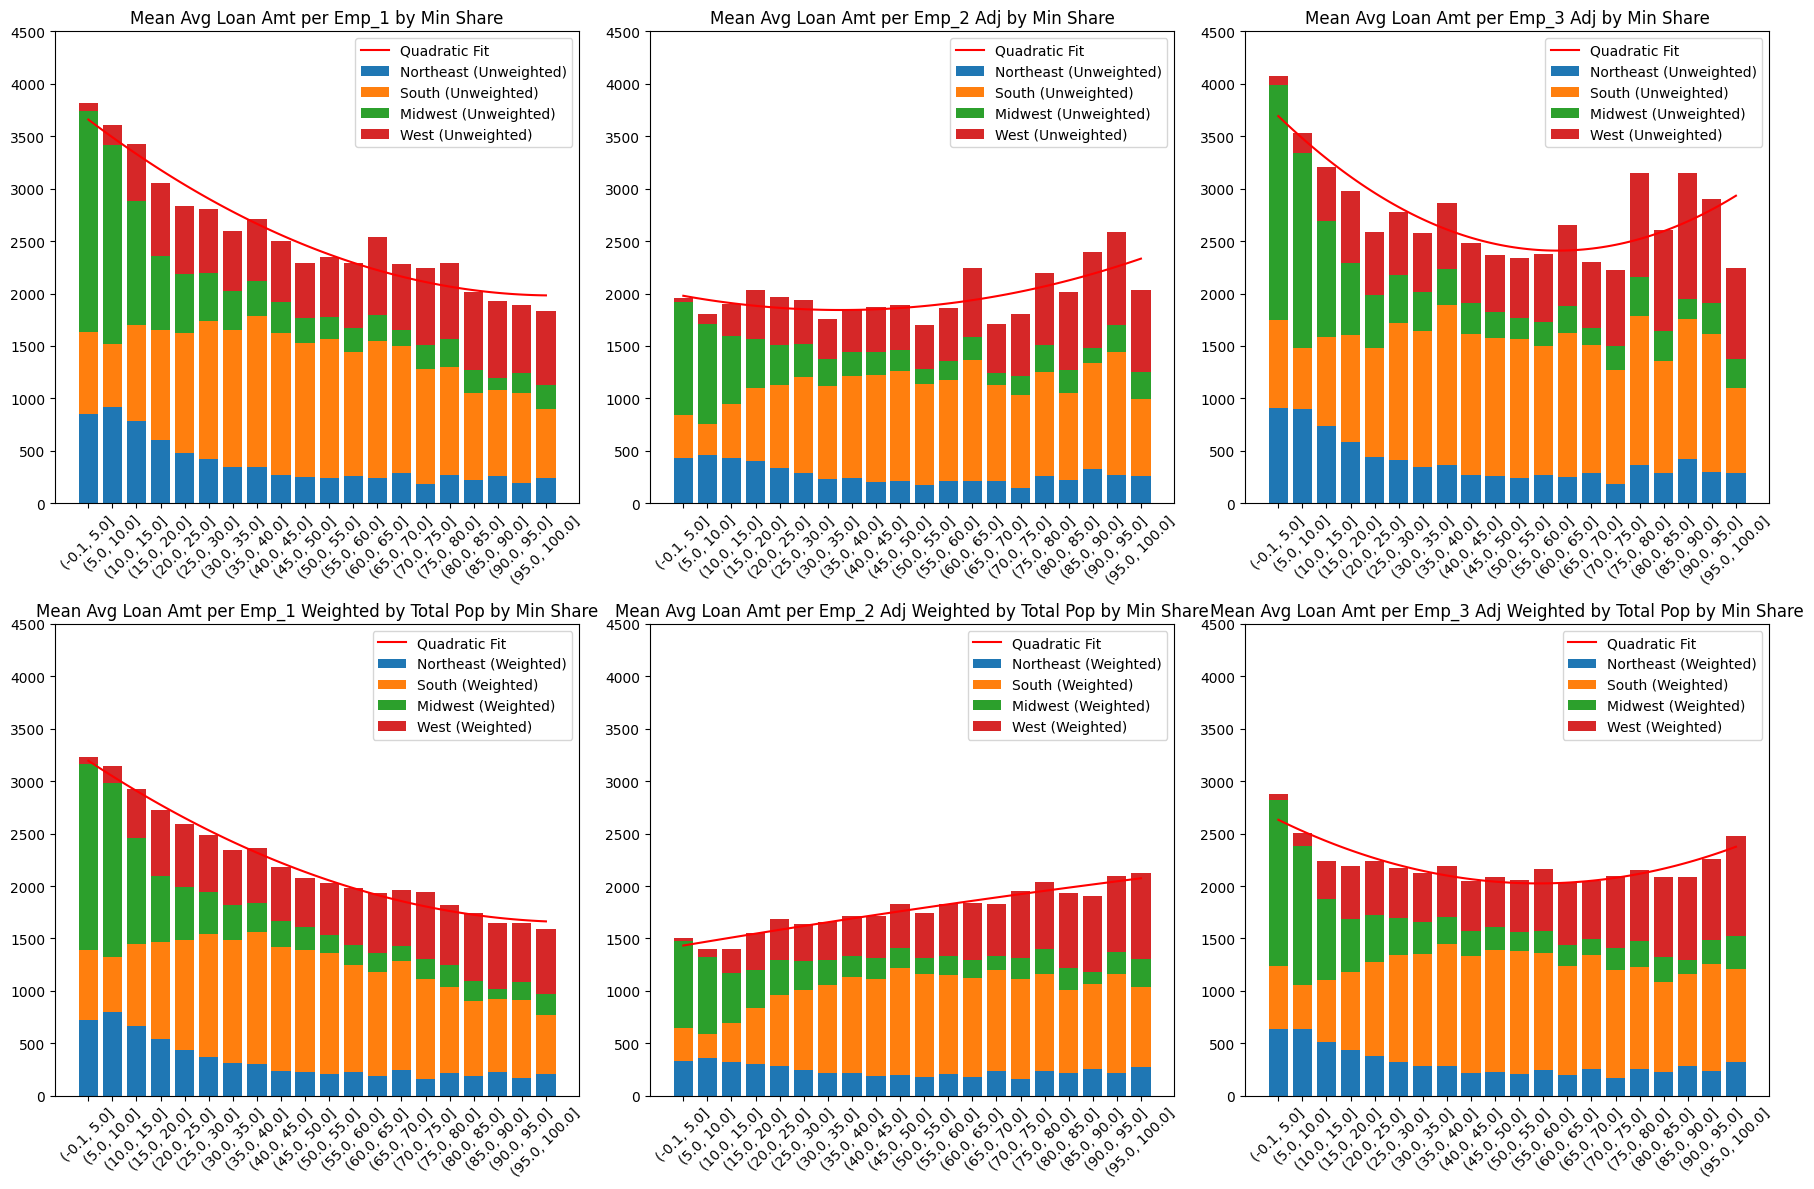

In [49]:
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj'], 'Total Pop', "Census Region", y_limits=[[0, 4500], [0, 4500]])

In [50]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, region_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, region_col])
    
    # Get unique regions
    unique_regions = df[region_col].unique()
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            # Calculate the total mean for each bin
            if measure == 'Weighted':
                df['Weighted'] = df[y_col] * df[weight_col]
                total_means = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                total_means = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Plotting the bar graph for the means
            ax.bar(total_means[bin_label].astype(str), total_means[total_means.columns[-1]], label=f'Mean {y_col} ({measure})', alpha = 0.2)
            
            # Create a secondary axis for percentages
            ax2 = ax.twinx()
            
            for region in unique_regions:
                region_df = df[df[region_col] == region]
                
                # Calculate the proportion of each region within each bin
                region_proportion = region_df.groupby(bin_label).size() / df.groupby(bin_label).size() * 100
                region_proportion = region_proportion.reset_index(name=f'Proportion {region}')
                
                # Plot the line graph for the region proportion
                ax2.plot(region_proportion[bin_label].astype(str), region_proportion[f'Proportion {region}'], label=f'{region} ({measure})')
                
            # Perform quadratic regression on the total means
            x_data = np.arange(len(total_means[bin_label]))
            y_data = total_means[total_means.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
#             ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(total_means[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                ax.set_ylim(y_limits[j])
            
            # Set the limit of the secondary y-axis to 0-100%
            ax2.set_ylim(0, 100)
            
#             ax.legend(loc='upper left')
            ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

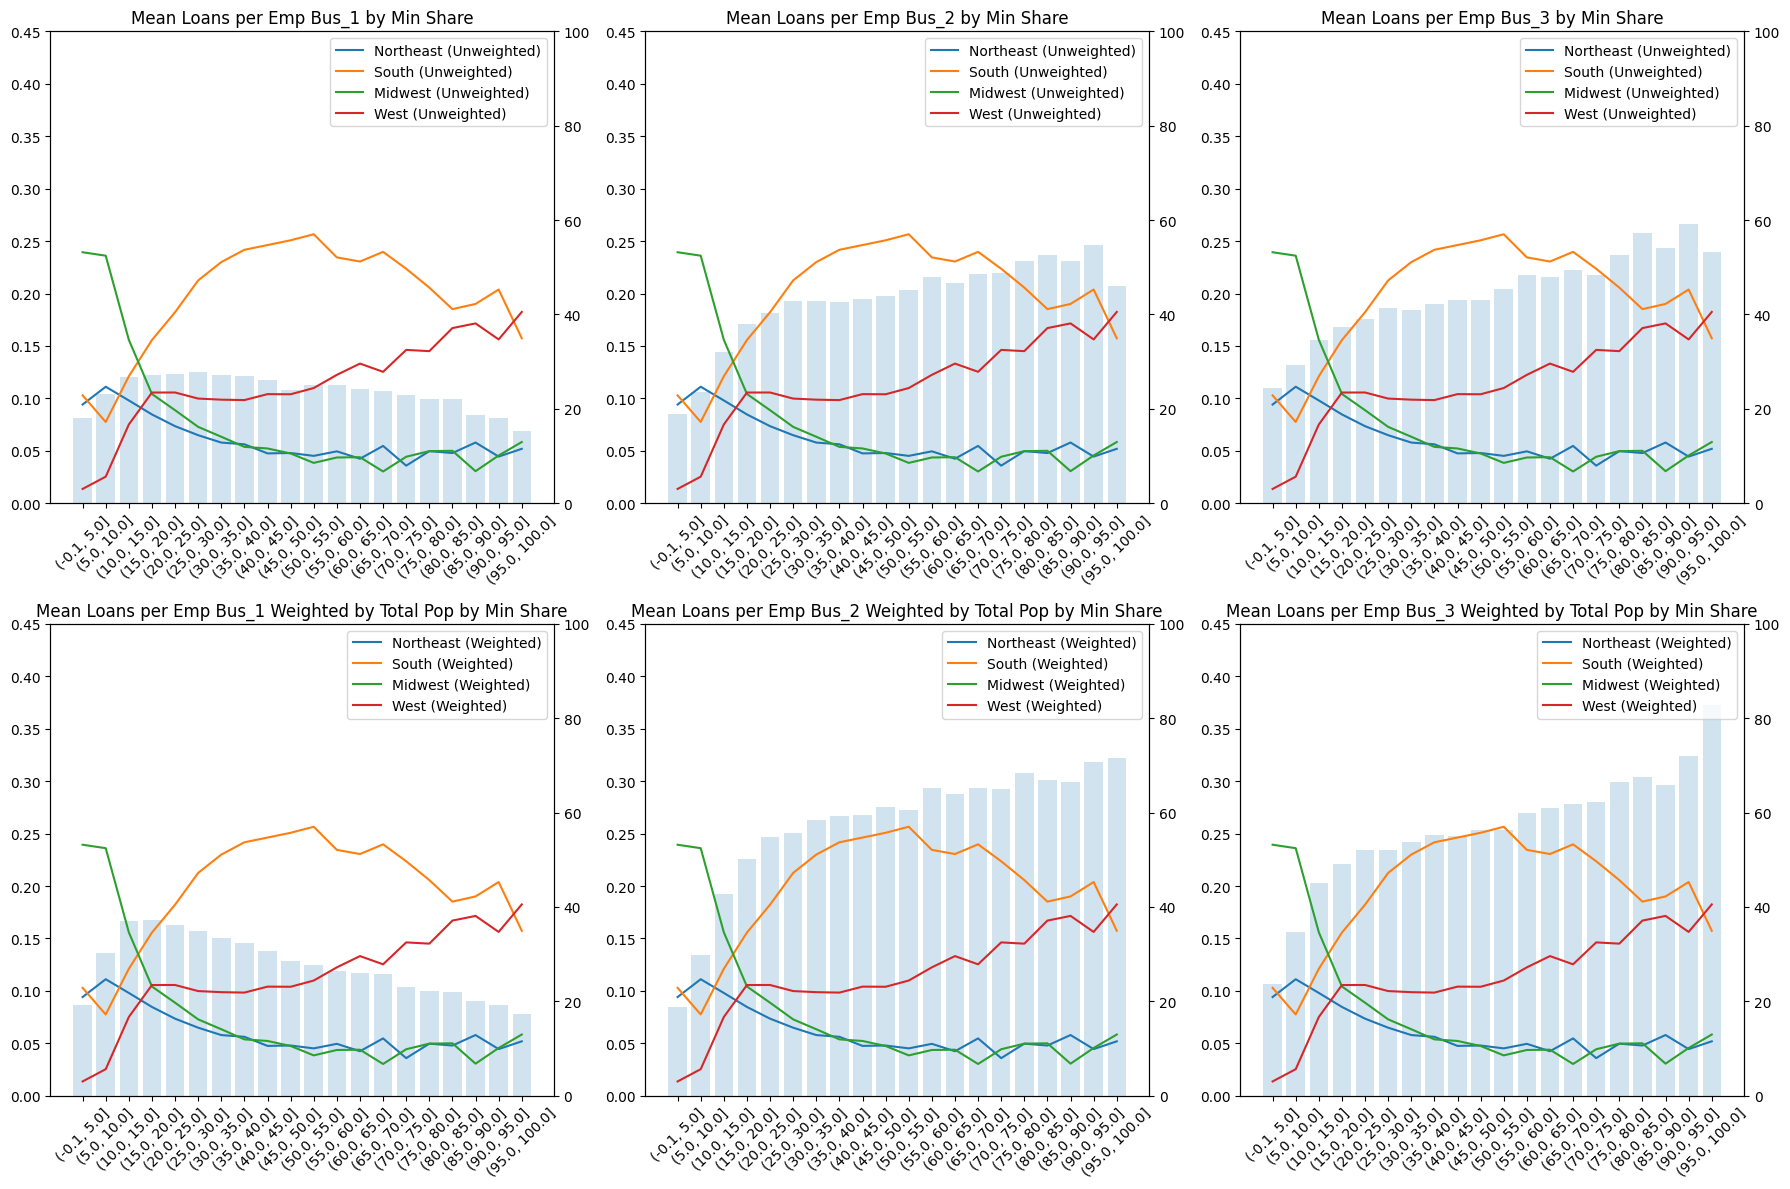

In [51]:
plot_multi_binned_means(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', "Census Region", y_limits=[[0, 0.45], [0, 0.45]])

In [54]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, color_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, color_col])
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if measure == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Calculate the average of the color column for each bin (not weighted)
            color_grouped = df.groupby(bin_label)[color_col].mean().reset_index(name=f'Average {color_col}')
            
            # Using ax.bar to create bar charts with normalized colors
            cmap = sns.color_palette("coolwarm", as_cmap=True)
            normed_color = (color_grouped[f'Average {color_col}'] - color_grouped[f'Average {color_col}'].min()) / (color_grouped[f'Average {color_col}'].max() - color_grouped[f'Average {color_col}'].min())
            ax.bar(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], color=cmap(normed_color), label=f'{x_col} ({measure})')
            
            # Perform quadratic regression
            x_data = np.arange(len(grouped[bin_label]))
            y_data = grouped[grouped.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
            ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(grouped[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                # Setting different y-limits for unweighted and weighted rows
                ax.set_ylim(y_limits[j])
                
            ax.legend()
    
    plt.tight_layout()
    plt.show()

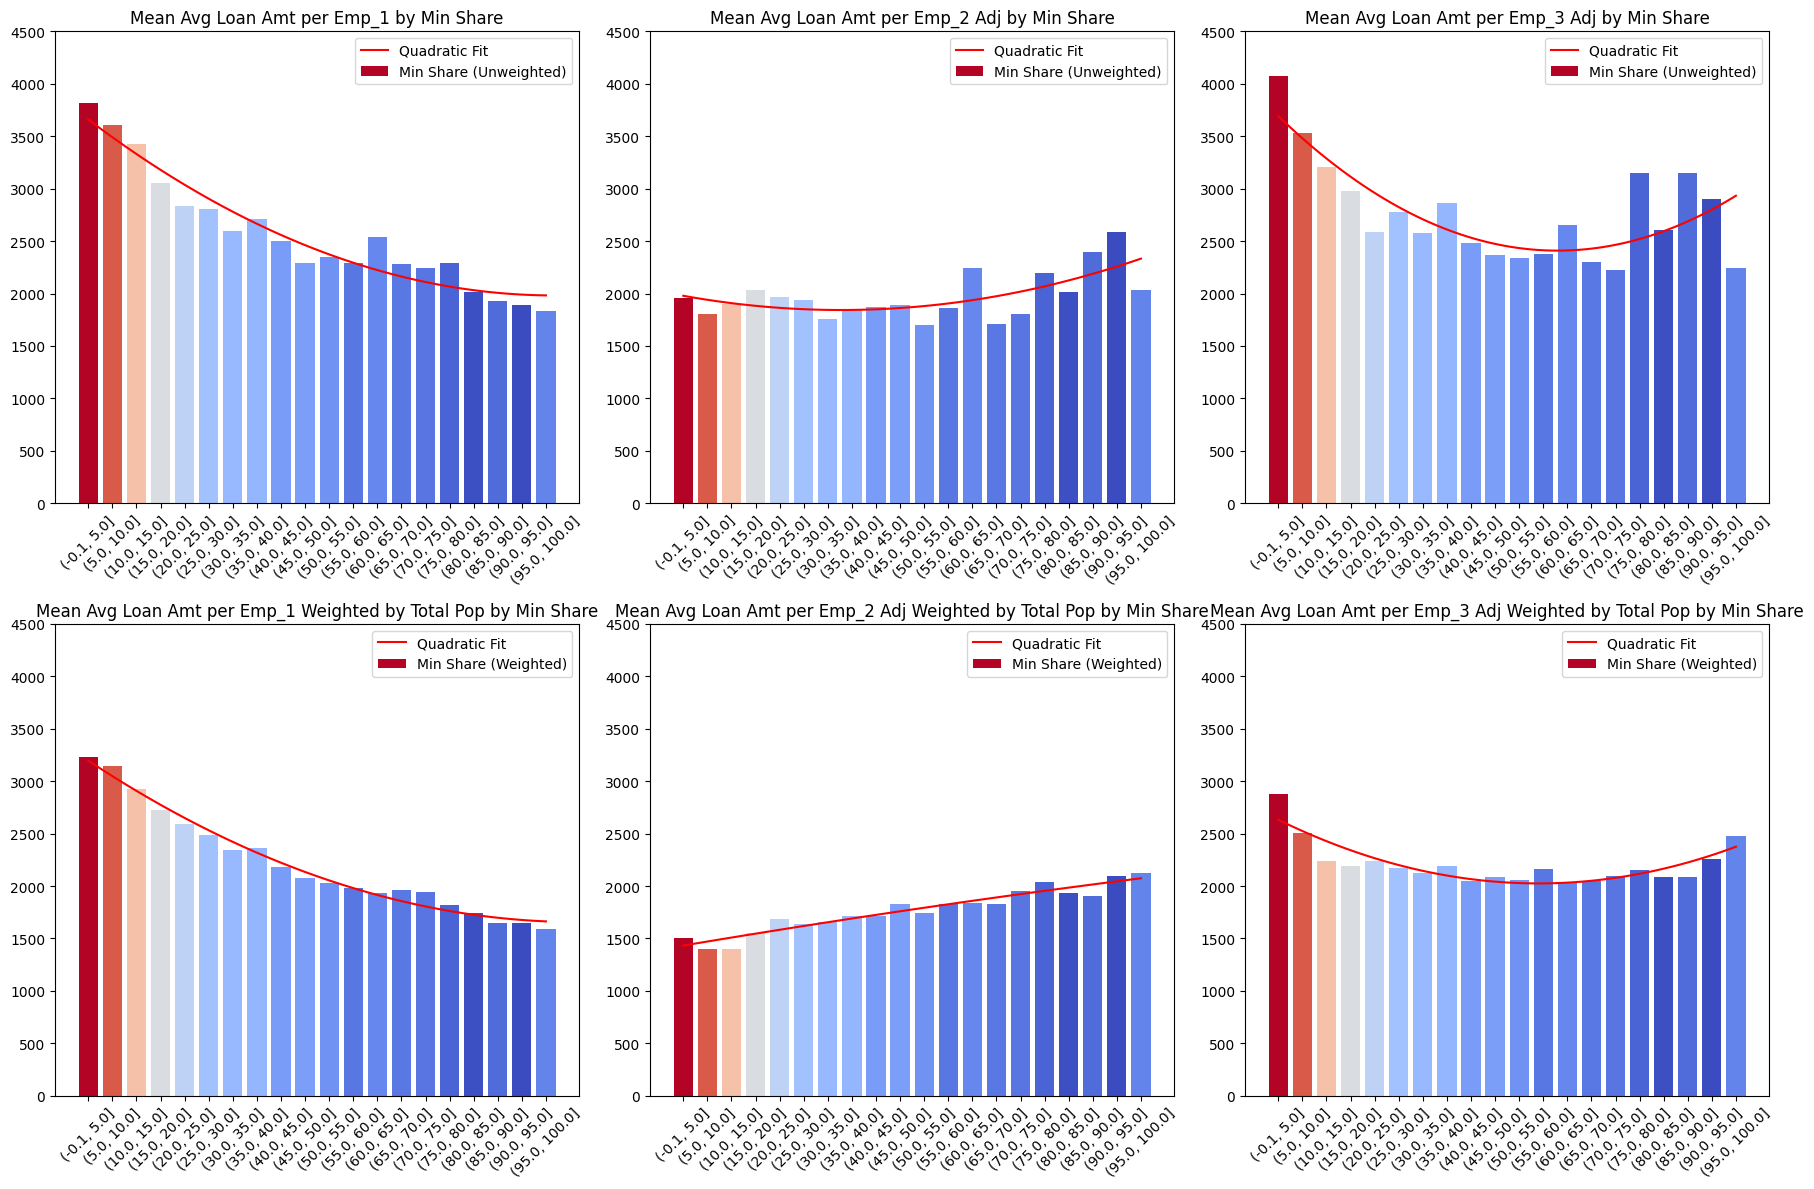

In [55]:
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj'], 'Total Pop', "Rural", y_limits=[[0, 4500], [0, 4500]])

In [56]:
stats_df.columns

Index(['Min Share', 'Min Share Excl B', 'Black Share', 'White Share',
       'Asian Share', 'Hisp Share', 'Native Share', 'Rural', 'PC Inc', 'Gini',
       'UR', '%BachOrMore', 'W_Avg Emp Min Share', 'W_Avg Emp Black Share',
       'W_Avg Emp White Share', 'W_Avg Emp Asian Share',
       'W_Avg Emp Hisp Share', 'W_Avg Emp Non-Hisp Share',
       'W_Avg Emp Min Share', 'W_Avg Emp Min Share', 'Total Pop',
       'Loans per Emp Bus', 'Avg Loan Amt per Emp', 'Loans per Emp Bus_1',
       'Avg Loan Amt per Emp_1', 'Loans per Emp Bus_2',
       'Avg Loan Amt per Emp_2', 'Loans per Emp Bus_3',
       'Avg Loan Amt per Emp_3', 'Avg Loan Amt per Emp_2 Adj',
       'Avg Loan Amt per Emp_3 Adj', 'Census Region'],
      dtype='object')

In [58]:
stats_df.to_csv("Stats.csv")